## Length of the code {-}
No restriction

**Delete this section from the report, when using this template.** 

Slides = https://nuwildcat-my.sharepoint.com/:p:/r/personal/lsi8012_ads_northwestern_edu/_layouts/15/Doc.aspx?sourcedoc=%7B60A619CB-1CEA-4047-83BC-C59E8F15A8C3%7D&file=MCMF%20Northwestern%20Slides.pptx&action=edit&mobileredirect=true

example = file:///C:/Users/sherr/OneDrive/Desktop/test_pip_env/final%20project/Final_Report_example.html

rds = file:///C:/Users/sherr/OneDrive/Desktop/test_pip_env/final%20project/RDS.pdf

population of each neighborhood data:
https://en.wikipedia.org/wiki/Community_areas_in_Chicago
read table in/ 


## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [5]:
!pip install BeautifulSoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd
# https://www.oneplaceonslow.org/blog/the-impact-of-poverty-on-child-care/

# Fetch the webpage
url = 'https://arrestjustice.wordpress.com/appendix/chicago-youth-population-chart/'

# Read all tables from the Wikipedia page
tables = pd.read_html(url)

poorkids = tables[0]




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install geodatasets
!pip install geopandas
## Reading and Cleaning Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets
from shapely.geometry import Point


# Example to load the dataset
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))


#Reading in the Program Data
programdata = pd.read_csv("../final project/My_CHI._My_Future._Programs.csv")

#Reading in Income Data from the Census
data1 = pd.read_csv("../final project/Chicago_CensusZipCodeTabulationArea.csv")

#Reading in Immigration Data from Census
data2 = pd.read_csv("../final project/Chicago_CensusZipCodeTabulationArea2.csv")
pd.set_option('display.max_columns', None)

#Reading in data for the information on the neighborhoods in the United States. I will then filter this under data prep/cleaning. 
neighborhooddata = pd.read_csv("../final project/usneighborhoods.csv")




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:

# Skip the first row to treat the second row as headers, and clean up column names and content
poorkidratiodata = pd.read_csv("../final project/poorkids.csv", skiprows=1)

poorkidratiodata.columns = poorkidratiodata.columns.str.strip()  # Remove extra spaces from headers

# Rename columns for clarity
poorkidratiodata.rename(columns={
    'Community Area': 'Neighborhood',
    '% Poor': 'Poor_Percentage'
}, inplace=True)

# Clean up data in the relevant columns
poorkidratiodata['Poor_Percentage'] = pd.to_numeric(poorkidratiodata['Poor_Percentage'], errors='coerce')
poorkidratiodata['Neighborhood'] = poorkidratiodata['Neighborhood'].str.strip()

# Drop rows with missing data in key columns
poorkidratiodata = poorkidratiodata.dropna(subset=['Poor_Percentage', 'Neighborhood'])

# Ensure numeric sorting by 'Poor_Percentage'
poorkidratiodata = poorkidratiodata.sort_values(by='Poor_Percentage', ascending=False)

# Display cleaned data
poorkidratiodata.head()


,Rank 2009,Neighborhood,Total 6-17,% City’s Youth,Poor_Percentage,12-14 (E.S.),15-17 (H.S.),Police Districts
69,70,54 – Riverdale,1623,0.37,72.6,446,265,05
57,58,40 – Washington Park,2860,0.66,61.6,795,814,02 • 03
20,21,68 – Englewood,7546,1.74,59.4,1628,2100,02 • 03 • 06 • 07
15,16,29 – North Lawndale,8830,2.04,56.4,1881,2747,10 • 11
75,76,37 – Fuller Park,579,0.13,54.4,245,169,02 • 09


In [42]:
# Analyze the distribution of each variable again with the new name
summary = []

for column in poorkidratiodata.columns:
    if poorkidratiodata[column].dtype == 'object':  # Categorical
        unique_values = poorkidratiodata[column].nunique()
        missing_values = poorkidratiodata[column].isnull().sum()
        value_counts = poorkidratiodata[column].value_counts().head(5)  # Top 5 levels
        summary.append({
            'Variable': column,
            'Type': 'Categorical',
            'Missing Values': missing_values,
            'Unique Values': unique_values,
            'Top Levels': value_counts.to_dict()
        })
  
# Convert summary to a DataFrame for better display
summary_df = pd.DataFrame(summary)
summary_df

,Variable,Type,Missing Values,Unique Values,Top Levels
0,Rank 2009,Categorical,0,77,"{'70': 1, '58': 1, '21': 1, '16': 1, '76': 1}"
1,Neighborhood,Categorical,0,77,"{'54 – Riverdale': 1, '40 – Washington Park': ..."
2,Total 6-17,Categorical,0,77,"{'1623': 1, '2860': 1, '7546': 1, '8830': 1, '..."
3,% City’s Youth,Categorical,0,68,"{'1.25': 3, '2.04': 2, '1.1': 2, '0.95': 2, '0..."
4,12-14 (E.S.),Categorical,0,75,"{'2601': 2, '514': 2, '795': 1, '1628': 1, '18..."
5,15-17 (H.S.),Categorical,0,77,"{'265': 1, '814': 1, '2100': 1, '2747': 1, '16..."
6,Police Districts,Categorical,0,48,"{'04': 7, '08': 5, '22': 4, '16': 4, '25': 3}"


In [43]:
poorkidratiodata.describe()

,Poor_Percentage
count,77.000000
mean,28.896104
std,16.195065
min,2.900000
25%,16.500000
50%,26.800000
75%,39.200000
max,72.600000


## Data Cleaning / Preparation


#### programdata cleaning

In [13]:
#discarding data for min / max age over 25 
#required
programdata = programdata[(programdata["Min Age"] < 25) & (programdata["Max Age"] < 25)]


#### df1 and df2 cleaning

In [12]:
#dropping unnecessary columns for df1 and df2
df1 = data1.loc[:, ~data1.columns.str.contains("Source")]
df2 = data2.loc[:, ~data2.columns.str.contains("Source")]

#merging these two datasets:
merged_df = pd.merge(df1, df2, on='placeDcid', how='inner') 
merged_df.columns


Index(['placeDcid', 'placeName_x', 'Date:Median_Income_Person',
       'Value:Median_Income_Person', 'Date:Count_Person_15To19Years',
       'Value:Count_Person_15To19Years', 'Date:Median_Age_Person',
       'Value:Median_Age_Person', 'Date:Count_Person', 'Value:Count_Person',
       'placeName_y',
       'Date:Count_Person_12To17Years_BelowPovertyLevelInThePast12Months',
       'Value:Count_Person_12To17Years_BelowPovertyLevelInThePast12Months',
       'Date:Count_Person_12To17Years_AbovePovertyLevelInThePast12Months',
       'Value:Count_Person_12To17Years_AbovePovertyLevelInThePast12Months',
       'Date:Count_Person_NotAUSCitizen', 'Value:Count_Person_NotAUSCitizen',
       'Date:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas',
       'Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas',
       'Date:Count_Person_USCitizenBornAbroadOfAmericanParents',
       'Value:Count_Person_USCitizenBornAbroadOfAmericanParents'],
      dtype='object')

#### chicago_neighborhood data cleaning

In [11]:
#the neighborhooddate consists of data from the entire U.S. 
#Filtered the neighborhoods to just Chicago, and dropped all of the unnecessary columns. 
chicago_neighborhood = neighborhooddata[neighborhooddata['city_name'] == "Chicago"]
chicago_neighborhood.drop(["city_name", 'neighborhood_ascii', 'city_id', 'state_name', 'source', 'timezone', 'county_fips', 'county_name', 'id'], axis =1, inplace = True )

# Expand rows with multiple ZIP codes into separate rows
chicago_expanded = chicago_neighborhood.assign(
    zips=chicago_neighborhood['zips'].str.split()
).explode('zips')


# Rename the column 'zips' to 'ZIP Code'
chicago_expanded = chicago_expanded.rename(columns={'zips': 'ZIP Code'})



C:\Users\sherr\AppData\Local\Temp\ipykernel_13492\3749649267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_neighborhood.drop(["city_name", 'neighborhood_ascii', 'city_id', 'state_name', 'source', 'timezone', 'county_fips', 'county_name', 'id'], axis =1, inplace = True )


There are 82 different zip-codes in the programdata, but only 45 zip codes in the found dataset that provides the median incomes. For now, we will conduct analysis on the given 45 zipcodes. 

In [14]:
#double checking everything merged properly

#Here, I decided to remove the columns that contains the "Date" because it is unnecessary for our upcoming analysis.
data2122 = merged_df.loc[:, ~merged_df.columns.str.contains("Date|placeDcid")]

#Renaming the zipcode column to ZIP Code for better merge 
data2122.rename(columns={"placeName_x": 'ZIP Code'}, inplace=True)

data2122.rename(columns={
    'Value:Median_Income_Person': 'Med_Income',
    'Value:Count_Person_15To19Years': 'Count_15to19',
    'Value:Median_Age_Person': 'Median Age',
    'Value:Count_Person': 'Total_Count',
    'Value:Count_Person_12To17Years_BelowPovertyLevelInThePast12Months': 'Below_Poverty12-17',
    'Value:Count_Person_12To17Years_AbovePovertyLevelInThePast12Months': 'Above_Poverty12-17',
    'Value:Count_Person_NotAUSCitizen': 'TotalNonCitizens'
}, inplace=True)

#Merging the programdata and the income data above to conduct more thorough analysis. 
alldata = pd.merge(programdata, data2122, on='ZIP Code', how='inner')



C:\Users\sherr\AppData\Local\Temp\ipykernel_13492\3987582574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2122.rename(columns={"placeName_x": 'ZIP Code'}, inplace=True)
C:\Users\sherr\AppData\Local\Temp\ipykernel_13492\3987582574.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2122.rename(columns={


In [15]:
# Dropping all the columns that are unnecessary for this analysis.
# Columns to remove
columns_to_remove = [
    'Description', 'Org Name', 'Min Age', 'Max Age', 'Start Date', 'End Date', 'Start Time',
    'End Time', 'Registration URL', 'Registration Open', 'Registration Deadline',
    'Contact Name', 'Contact Email', 'Contact Phone', 'Image', 'Hidden Programs', 'Featured',
    'Online Address', 'hour_duration', 'eligible_days', 'adjusted_duration', 'Program URL', 'Custom Categories', 'Address', 'placeName_y'
]

# Remove specified columns
alldata_filtered = alldata.drop(columns=columns_to_remove, errors='ignore')
alldata_filtered

,Program ID,Program Name,Category Name,Capacity,City,State,ZIP Code,Program Type,Program Price,Geographic Cluster Name,Scholarship Available,Participants Paid,Transport Provided,Has Free Food,Meeting Type,Tag,Latitude,Longitude,Location,Med_Income,Count_15to19,Median Age,Total_Count,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents
0,208105,Increase The Peace Summer Series: Carnival,Food.,100.0,Chicago,IL,60609.0,workshop,Free,NaN,False,NaN,NaN,NaN,face_to_face,Event,NaN,NaN,NaN,28607,4176,35.4,63241,1984,3572,10035,720,686
1,208104,Increase The Peace Summer Series: Carnival,Music & Art.,100.0,Chicago,IL,60609.0,workshop,Free,NaN,False,NaN,NaN,NaN,face_to_face,Event,NaN,NaN,NaN,28607,4176,35.4,63241,1984,3572,10035,720,686
2,88175,Phalanx Family Services,Work + Career,0.0,Chicago,IL,60643.0,workshop,Free,WEST PULLMAN,False,Not Paid,False,False,online,Program,41.677101,-87.643402,POINT (-87.6434021 41.677101135),41620,3295,42.8,48270,811,3129,358,23,96
3,119277,Weightlifting at Union,Sports + Wellness.,10.0,Chicago,IL,60607.0,workshop,Free,NEAR WEST SIDE,False,Not Paid,False,False,face_to_face,Program,41.884602,-87.664200,POINT (-87.664199829 41.884601593),73910,2728,30.9,28797,108,486,3778,236,214
4,176040,Origami Workshop with Ty Yamamoto,Music & Art.,0.0,Chicago,IL,60608.0,workshop,Free,BRIDGEPORT,False,Not Paid,False,False,face_to_face,Event,41.832638,-87.646461,POINT (-87.646461487 41.832637787),33462,4002,34.1,82749,1176,3487,11864,635,978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109931,151524,Learn to Swim at West Pullman,Sports + Wellness.,12.0,Chicago,IL,60628.0,workshop,$50 or Less,WEST PULLMAN,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192
109932,150969,Soccer for Success at Rowan,Sports + Wellness.,20.0,Chicago,IL,60617.0,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.684898,-87.537300,POINT (-87.53730011 41.684898376),30040,5693,36.8,83188,2508,5866,6377,843,430
109933,143162,Bitty Basketball at Rowan,Sports + Wellness.,10.0,Chicago,IL,60617.0,workshop,$50 or Less,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.684898,-87.537300,POINT (-87.53730011 41.684898376),30040,5693,36.8,83188,2508,5866,6377,843,430
109934,151189,Music and Movement at Rowan,Music & Art.,10.0,Chicago,IL,60617.0,workshop,Free,EAST SIDE,False,Not Paid,False,False,face_to_face,Program,41.684898,-87.537300,POINT (-87.53730011 41.684898376),30040,5693,36.8,83188,2508,5866,6377,843,430


#### Missingness and Imputation for Data

In [16]:
#First, to check ratio of missing data:
# Check the summary of missing data for each column
missing_data_summary = alldata_filtered.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data_summary / len(alldata_filtered)) * 100

# Combine counts and percentages into a single DataFrame
missing_summary_df = pd.DataFrame({
    'Missing Count': missing_data_summary,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Percentage (%)', ascending=False)

print(missing_summary_df)

#I will proceed to remove the top five columns with over 70% missingness in the data. They are not necessary
#for my data, and the high missingness will lead to inaccuracy and be unhelpful. 
#I will also drop Contact Phone, Contact Email because it isn't useful for my dataset. 

#Columns I will drop
dropcolumns = ['Registration Open', "Custom Categories", "Online Address", "Image", "Registration Deadline", "Contact Phone", "Contact Email"]

#alldata_filtered.drop(dropcolumns, axis=1, inplace=True)
alldata_filtered.columns
alldata_filtered.shape

                                                    Missing Count  \
Capacity                                                     3017   
Geographic Cluster Name                                      1958   
Transport Provided                                           1481   
Participants Paid                                            1304   
Has Free Food                                                 782   
Longitude                                                     584   
Latitude                                                      584   
Location                                                      584   
Category Name                                                   0   
Program Name                                                    0   
City                                                            0   
Program ID                                                      0   
Scholarship Available                                           0   
Program Price                     

(109936, 28)

I noticed some inconsistencies in the zip code and geographic clusters, so I've decided to find another dataset to update the neighborhood names with the zip code. https://simplemaps.com/data/us-neighborhoods

In [17]:
alldata_filtered['ZIP Code'] = alldata_filtered['ZIP Code'].astype(str)
alldata_filtered['ZIP Code'] =alldata_filtered['ZIP Code'].str.replace(r'\.0$', '', regex=True)
alldata_filtered

chicago_expanded['ZIP Code'] = chicago_expanded['ZIP Code'].astype(str)


finalmerge = pd.merge(alldata_filtered, chicago_expanded, on='ZIP Code', how='inner')
finalmerge.drop(['Geographic Cluster Name'], axis = 1)

#making sure that the meeting type is face to face, because online meetings can't identify neighborhood.
finalmerge = finalmerge[finalmerge['Meeting Type'] == "face_to_face"]

In [18]:

# Replace missing values in the Latitude column with values from the Lat column
finalmerge['Latitude'] = finalmerge['Latitude'].fillna(finalmerge['lat'])

# Replace missing values in the Longitude column with values from the Lon column
finalmerge['Longitude'] = finalmerge['Longitude'].fillna(finalmerge['lng'])


distinct_zips = finalmerge['ZIP Code'].unique()


In [21]:
finalmerge.isnull().sum()

Program ID                                                         0
Program Name                                                       0
Category Name                                                      0
Capacity                                                       10813
City                                                               0
State                                                              0
ZIP Code                                                           0
Program Type                                                       0
Program Price                                                      0
Geographic Cluster Name                                         6796
Scholarship Available                                              0
Participants Paid                                               4753
Transport Provided                                              5398
Has Free Food                                                   2733
Meeting Type                      

In [34]:
# Calculate distribution for categorical and continuous variables

# Separate categorical and continuous variables
categorical_vars = finalmerge.select_dtypes(include=['object', 'category']).columns
continuous_vars = finalmerge.select_dtypes(include=['number']).columns

# Distribution for categorical variables
categorical_distribution = []
for col in categorical_vars:
    missing_count = finalmerge[col].isnull().sum()
    unique_count = finalmerge[col].nunique()
    top_levels = finalmerge[col].value_counts().head(5).to_dict()  # Top 5 levels
    categorical_distribution.append({
        'Variable': col,
        'Missing Values': missing_count,
        'Unique Values': unique_count,
        'Top Levels (Count)': top_levels
    })

# Distribution for continuous variables
continuous_distribution = []
for col in continuous_vars:
    missing_count = finalmerge[col].isnull().sum()
    min_value = finalmerge[col].min()
    max_value = finalmerge[col].max()
    mean_value = finalmerge[col].mean()
    std_dev = finalmerge[col].std()
    continuous_distribution.append({
        'Variable': col,
        'Missing Values': missing_count,
        'Min': min_value,
        'Max': max_value,
        'Mean': mean_value,
        'Std Dev': std_dev
    })


categorical_df = pd.DataFrame(categorical_distribution)
continuous_df = pd.DataFrame(continuous_distribution)


categorical_df
continuous_df

,Variable,Missing Values,Min,Max,Mean,Std Dev
0,Program ID,0,79232.000000,211184.000000,149479.849515,36324.838725
1,Latitude,0,41.657200,42.022099,41.834813,0.090951
2,Longitude,0,-87.785698,-87.530502,-87.664830,0.053828
3,Med_Income,0,19697.000000,104763.000000,37122.585393,13473.538118
4,Count_15to19,0,0.000000,7036.000000,3756.541591,1394.608505
5,Median Age,0,30.900000,42.800000,36.412687,3.015655
6,Total_Count,0,737.000000,92235.000000,63702.297354,18463.112745
7,Below_Poverty12-17,0,0.000000,2639.000000,1224.712286,652.820879
8,Above_Poverty12-17,0,0.000000,6818.000000,3374.968180,1565.325591
9,TotalNonCitizens,0,39.000000,19712.000000,7026.800798,5509.629152


In [36]:
finalmerge.describe()

,Program ID,Latitude,Longitude,Med_Income,Count_15to19,Median Age,Total_Count,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents,lat,lng
count,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000,383906.000000
mean,149479.849515,41.834813,-87.664830,37122.585393,3756.541591,36.412687,63702.297354,1224.712286,3374.968180,7026.800798,564.488357,609.870578,41.833916,-87.664768
std,36324.838725,0.090951,0.053828,13473.538118,1394.608505,3.015655,18463.112745,652.820879,1565.325591,5509.629152,737.997089,382.641379,0.092725,0.053582
min,79232.000000,41.657200,-87.785698,19697.000000,0.000000,30.900000,737.000000,0.000000,0.000000,39.000000,0.000000,0.000000,41.660140,-87.771170
25%,117448.000000,41.762566,-87.702507,28621.000000,2782.000000,34.200000,50135.000000,802.000000,2414.000000,896.000000,60.000000,196.000000,41.763250,-87.714000
50%,147711.000000,41.831722,-87.666756,33462.000000,4002.000000,35.400000,63241.000000,1176.000000,3129.000000,6377.000000,364.000000,667.000000,41.836150,-87.663520
75%,183404.000000,41.910145,-87.628601,41620.000000,4550.000000,37.600000,82749.000000,1638.000000,3774.000000,10035.000000,720.000000,878.000000,41.901210,-87.623370
max,211184.000000,42.022099,-87.530502,104763.000000,7036.000000,42.800000,92235.000000,2639.000000,6818.000000,19712.000000,3638.000000,1339.000000,42.009620,-87.534900


Now we have majority of the data cleaned up, let's narrow down our dataset to impute the zip and its count of programs. 

#### 1. Imputing Capacity 

I initially spent a lot of time making assumpings on capacity, but since this is not necessary due to inaccurate data stated 11/19/2024 on Ed Discussion, I proceeded to simply remove the column. I will keep the code here to show an attempt in imputation. 

In [20]:
#imputing capacity:
finalmerge['Capacity'] = finalmerge['Capacity'].fillna(finalmerge['Capacity'].median())
finalmerge

#populating the location column:
# Create the Location column by combining Latitude and Longitude into POINT format
finalmerge['Location'] = finalmerge.apply(
    lambda row: f"POINT ({row['Longitude']} {row['Latitude']})" if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']) else None,
    axis=1
)

finalmerge


,Program ID,Program Name,Category Name,Capacity,City,State,ZIP Code,Program Type,Program Price,Geographic Cluster Name,Scholarship Available,Participants Paid,Transport Provided,Has Free Food,Meeting Type,Tag,Latitude,Longitude,Location,Med_Income,Count_15to19,Median Age,Total_Count,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents,neighborhood,lat,lng,state_id
0,208105,Increase The Peace Summer Series: Carnival,Food.,100.0,Chicago,IL,60609,workshop,Free,NaN,False,NaN,NaN,NaN,face_to_face,Event,41.809090,-87.632420,POINT (-87.63242 41.80909),28607,4176,35.4,63241,1984,3572,10035,720,686,Fuller Park,41.80909,-87.63242,IL
1,208105,Increase The Peace Summer Series: Carnival,Food.,100.0,Chicago,IL,60609,workshop,Free,NaN,False,NaN,NaN,NaN,face_to_face,Event,41.812950,-87.617860,POINT (-87.61786 41.81295),28607,4176,35.4,63241,1984,3572,10035,720,686,Grand Boulevard,41.81295,-87.61786,IL
2,208105,Increase The Peace Summer Series: Carnival,Food.,100.0,Chicago,IL,60609,workshop,Free,NaN,False,NaN,NaN,NaN,face_to_face,Event,41.842080,-87.633970,POINT (-87.63397 41.84208),28607,4176,35.4,63241,1984,3572,10035,720,686,Armour Square,41.84208,-87.63397,IL
3,208105,Increase The Peace Summer Series: Carnival,Food.,100.0,Chicago,IL,60609,workshop,Free,NaN,False,NaN,NaN,NaN,face_to_face,Event,41.829920,-87.672500,POINT (-87.6725 41.82992),28607,4176,35.4,63241,1984,3572,10035,720,686,Mckinley Park,41.82992,-87.67250,IL
4,208105,Increase The Peace Summer Series: Carnival,Food.,100.0,Chicago,IL,60609,workshop,Free,NaN,False,NaN,NaN,NaN,face_to_face,Event,41.836150,-87.648790,POINT (-87.64879 41.83615),28607,4176,35.4,63241,1984,3572,10035,720,686,Bridgeport,41.83615,-87.64879,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389680,150777,Dance - Hip Hop at West Pullman,Sports + Wellness.,10.0,Chicago,IL,60628,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192,Pullman,41.70613,-87.59825,IL
389681,150777,Dance - Hip Hop at West Pullman,Sports + Wellness.,10.0,Chicago,IL,60628,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192,West Pullman,41.67382,-87.63574,IL
389682,150777,Dance - Hip Hop at West Pullman,Sports + Wellness.,10.0,Chicago,IL,60628,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192,Riverdale,41.66014,-87.60285,IL
389683,150777,Dance - Hip Hop at West Pullman,Sports + Wellness.,10.0,Chicago,IL,60628,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192,Washington Heights,41.71749,-87.64890,IL


In [21]:
twohun = finalmerge[finalmerge['Capacity'] > 200]

# Adjust pandas options to display all rows and columns if needed
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Expand the width of the display

twohun['Capacity'].value_counts()

Capacity
253.0         10331
243.0          1330
429.0           442
421.0           433
1012.0          418
610.0           390
1310.0          350
631.0           232
4219.0          173
6310.0          140
4139.0          118
300.0           118
500.0           114
1812.0          108
413.0            87
400.0            62
42139.0          58
2104312.0        56
63110.0          56
21043.0          56
61310.0          46
631310.0         38
10412.0          34
101812.0         34
450.0            30
419.0            24
250.0            22
600.0            20
480.0            14
360.0            14
2103.0           10
210.0            10
613.0            10
2000.0           10
2104.0           10
10418312.0        8
233.0             6
800.0             4
1018.0            4
1000.0            4
6313110.0         4
225.0             2
Name: count, dtype: int64

In [22]:
finalmerge = finalmerge[~finalmerge["Program Name"].str.contains("Info Session", case=False, na=False)]
finalmerge.loc[finalmerge['Program Name'] == "Mihtotilliztli: The Dance of Life", 'Capacity'] = 100
finalmerge.loc[finalmerge['Program Name'] == "Chess with Dave", 'Capacity'] = 100


# Calculate mean capacity for each ZIP Code
mean_capacity_by_zip = finalmerge.groupby("ZIP Code")["Capacity"].mean().reset_index()
mean_capacity_by_zip

,ZIP Code,Capacity
0,60601,43.200000
1,60602,36.000000
2,60603,17.636364
3,60604,63.642857
4,60605,30.999494
5,60606,24.645161
6,60607,43.524412
7,60608,58.502198
8,60609,519.012308
9,60610,25.342942


In [23]:
#remove Capacity column 
#I will leave code above to demonstrate hours of input into data cleaning. 
alldata_filtered = alldata.drop(columns="Capacity", errors='ignore')

#### 1.a Micromanaging each abnormally high zip code and altering their max capacity.

In [24]:
#After seeing an abnormally high number of capacity for each zip code, I proceeded
#to check each zip code and made changes to the max capacity. 

check = finalmerge[finalmerge['ZIP Code'] == '60623']

# Reset pandas options to their default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

check.sort_values(by='Capacity', ascending=False)
check[check['Program Name'] == "Mihtotilliztli: The Dance of Life"]






,Program ID,Program Name,Category Name,Capacity,City,State,ZIP Code,Program Type,Program Price,Geographic Cluster Name,...,Total_Count,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents,neighborhood,lat,lng,state_id


In [25]:
check = finalmerge[finalmerge['ZIP Code'] == '60643']
check.sort_values(by='Capacity', ascending=False)

,Program ID,Program Name,Category Name,Capacity,City,State,ZIP Code,Program Type,Program Price,Geographic Cluster Name,...,Total_Count,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents,neighborhood,lat,lng,state_id
369690,135215,"Teen Crafts, Games and Play",Music & Art.,1812.0,Chicago,IL,60643,workshop,Free,Far South Equity Zone,...,48270,811,3129,358,23,96,Washington Heights,41.71749,-87.64890,IL
370784,135215,"Teen Crafts, Games and Play",Music & Art.,1812.0,Chicago,IL,60643,workshop,Free,MORGAN PARK,...,48270,811,3129,358,23,96,West Pullman,41.67382,-87.63574,IL
370785,135215,"Teen Crafts, Games and Play",Music & Art.,1812.0,Chicago,IL,60643,workshop,Free,MORGAN PARK,...,48270,811,3129,358,23,96,Beverly,41.71315,-87.67508,IL
370786,135215,"Teen Crafts, Games and Play",Music & Art.,1812.0,Chicago,IL,60643,workshop,Free,MORGAN PARK,...,48270,811,3129,358,23,96,Washington Heights,41.71749,-87.64890,IL
370787,135215,"Teen Crafts, Games and Play",Music & Art.,1812.0,Chicago,IL,60643,workshop,Free,MORGAN PARK,...,48270,811,3129,358,23,96,Morgan Park,41.68973,-87.66905,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377594,209444,DIY Ice Cream Workshop,Building & Fixing Things,0.0,Chicago,IL,60643,workshop,Free,NaN,...,48270,811,3129,358,23,96,Beverly,41.71315,-87.67508,IL
377593,209444,DIY Ice Cream Workshop,Building & Fixing Things,0.0,Chicago,IL,60643,workshop,Free,NaN,...,48270,811,3129,358,23,96,West Pullman,41.67382,-87.63574,IL
319856,156436,Makers and Gamers,Music & Art.,0.0,Chicago,IL,60643,workshop,Free,Far South Equity Zone,...,48270,811,3129,358,23,96,Beverly,41.71315,-87.67508,IL
319855,156436,Makers and Gamers,Music & Art.,0.0,Chicago,IL,60643,workshop,Free,Far South Equity Zone,...,48270,811,3129,358,23,96,West Pullman,41.67382,-87.63574,IL


In [26]:
check = finalmerge[finalmerge['ZIP Code'] == '60612']
check

check['Capacity'].value_counts()
check[check['Capacity'] == 0.0]

#Here, I notice there are a lot of Info Sessions. I will remove these programs because they aren't necessarily a program, and to not skew my data.



,Program ID,Program Name,Category Name,Capacity,City,State,ZIP Code,Program Type,Program Price,Geographic Cluster Name,...,Total_Count,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents,neighborhood,lat,lng,state_id
24777,147364,Teen Opportunity Fair at Malcolm X,Work + Career,0.0,Chicago,IL,60612,workshop,Free,West Equity Zone,...,34459,802,1656,1800,190,200,West Town,41.90121,-87.67636,IL
24778,147364,Teen Opportunity Fair at Malcolm X,Work + Career,0.0,Chicago,IL,60612,workshop,Free,West Equity Zone,...,34459,802,1656,1800,190,200,East Garfield Park,41.87891,-87.70590,IL
24779,147364,Teen Opportunity Fair at Malcolm X,Work + Career,0.0,Chicago,IL,60612,workshop,Free,West Equity Zone,...,34459,802,1656,1800,190,200,Near West Side,41.87401,-87.66352,IL
25382,209471,Ice Skating at Fifth Third Arena,Music & Art.,0.0,Chicago,IL,60612,workshop,Free,NaN,...,34459,802,1656,1800,190,200,West Town,41.90121,-87.67636,IL
25383,209471,Ice Skating at Fifth Third Arena,Music & Art.,0.0,Chicago,IL,60612,workshop,Free,NaN,...,34459,802,1656,1800,190,200,East Garfield Park,41.87891,-87.70590,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82709,207790,Bug and Reptile Show with Crosstown Exotics,Science,0.0,Chicago,IL,60612,workshop,Free,West Equity Zone,...,34459,802,1656,1800,190,200,East Garfield Park,41.87891,-87.70590,IL
82710,207790,Bug and Reptile Show with Crosstown Exotics,Science,0.0,Chicago,IL,60612,workshop,Free,West Equity Zone,...,34459,802,1656,1800,190,200,Near West Side,41.87401,-87.66352,IL
84120,208499,Discover Electricity with Discover Science Ass...,Science,0.0,Chicago,IL,60612,workshop,Free,West Equity Zone,...,34459,802,1656,1800,190,200,West Town,41.90121,-87.67636,IL
84121,208499,Discover Electricity with Discover Science Ass...,Science,0.0,Chicago,IL,60612,workshop,Free,West Equity Zone,...,34459,802,1656,1800,190,200,East Garfield Park,41.87891,-87.70590,IL


In [27]:
# this checks for the mean capacity for zip once again.
mean_capacity_by_zip

,ZIP Code,Capacity
0,60601,43.200000
1,60602,36.000000
2,60603,17.636364
3,60604,63.642857
4,60605,30.999494
5,60606,24.645161
6,60607,43.524412
7,60608,58.502198
8,60609,519.012308
9,60610,25.342942


#### Checking for missing data once again after Data Cleaning

In [ ]:
# List of variables to remove
columns_to_remove = ["Capacity", "Geographic Cluster Name", "Transport Provided", 
                     "Participants Paid", "Location"]

# Drop the specified columns from the DataFrame
finalmerge = finalmerge.drop(columns=columns_to_remove)


KeyError: "['Capacity', 'Geographic Cluster Name', 'Transport Provided', 'Participants Paid', 'Location'] not found in axis"

In [29]:
# Remove rows where 'Has Free Food' is missing
finalmerge = finalmerge.dropna(subset=['Has Free Food'])

# Check the summary of missing data for each column after removal
missing_data_summary2 = finalmerge.isnull().sum().sort_values(ascending=False)
missing_percentage2 = (missing_data_summary2 / len(finalmerge)) * 100

# Combine counts and percentages into a single DataFrame
missing_summary_df2 = pd.DataFrame({
    'Missing Count': missing_data_summary2,
    'Missing Percentage (%)': missing_percentage2
}).sort_values(by='Missing Percentage (%)', ascending=False)

print(missing_summary_df2)


                                                    Missing Count  \
Program ID                                                      0   
Program Name                                                    0   
Category Name                                                   0   
City                                                            0   
State                                                           0   
ZIP Code                                                        0   
Program Type                                                    0   
Program Price                                                   0   
Scholarship Available                                           0   
Has Free Food                                                   0   
Meeting Type                                                    0   
Tag                                                             0   
Latitude                                                        0   
Longitude                         

#### 1. Checking # of Programs that offers a "Scholarship" per neighborhood | Grouping them

In [48]:
# To check the scholarship counts. 
scholarship_counts = alldata_filtered['Scholarship Available'].value_counts()
print(scholarship_counts)

finalmerge['Scholarship Available']
finalmerge

finalmerge['Scholarship Available'].value_counts()
# Drop rows with NA values in the 'Has Free Food' column
finalmerge = finalmerge.dropna(subset=['Scholarship Available'])

# Display the first few rows to confirm
finalmerge.head()


# Group by 'neighborhood' and count 'Program ID' where 'Has Free Food' is True
scholarship_grouped_data = finalmerge[finalmerge["Scholarship Available"] == True].groupby("ZIP Code")["Program ID"].count().reset_index()

# Rename columns for clarity
scholarship_grouped_data.rename(columns={"Program ID": "Program Count (Scholarship Available)"}, inplace=True)

# Display the grouped data
print(scholarship_grouped_data)


Scholarship Available
False    109681
True        255
Name: count, dtype: int64
   ZIP Code  Program Count (Scholarship Available)
0     60605                                     48
1     60607                                     20
2     60609                                     60
3     60610                                      6
4     60611                                      2
5     60612                                     48
6     60613                                     12
7     60614                                     14
8     60615                                     12
9     60618                                     30
10    60619                                     24
11    60622                                     12
12    60623                                      6
13    60624                                     48
14    60628                                    312
15    60632                                     28
16    60636                                      2
17

#### 2. Checking # of Programs that offers "Free Food" per neighborhood

In [47]:
finalmerge['Has Free Food'].value_counts()
# Drop rows with NA values in the 'Has Free Food' column
finalmerge= finalmerge.dropna(subset=["Has Free Food"])

# Display the first few rows to confirm
finalmerge.head()

# Group by 'neighborhood' and count 'Program ID' where 'Has Free Food' is True
food_grouped_data = finalmerge[finalmerge["Has Free Food"] == True].groupby("ZIP Code")["Program ID"].count().reset_index()

# Rename columns for clarity
food_grouped_data.rename(columns={"Program ID": "Program Count (Free Food)"}, inplace=True)

# Display the grouped data
print(food_grouped_data)


   ZIP Code  Program Count (Free Food)
0     60602                         16
1     60604                          4
2     60605                        106
3     60606                         60
4     60607                         29
5     60608                        105
6     60609                        474
7     60610                         14
8     60611                         30
9     60612                        393
10    60613                         12
11    60614                          8
12    60615                        184
13    60616                         52
14    60617                         65
15    60618                         48
16    60619                        204
17    60621                         44
18    60622                         30
19    60623                        188
20    60624                        516
21    60625                         12
22    60626                         10
23    60628                       1056
24    60630              

#### 3. To check the value counts of each category in the final merge and cleaned dataset

In [46]:
finalmerge["Category Name"].value_counts()

Category Name
Sports + Wellness.          180851
Music & Art.                118370
Reading & Writing.           40517
Academic Support              9542
Science                       9229
Building & Fixing Things      6462
Computers.                    4452
Helping Your Community.       3869
Nature.                       2422
Food.                         2290
Healthcare                    1664
Work + Career                 1540
Performance.                  1489
Digital Media.                 453
Managing Money.                294
Customer/Human Service         164
Social Studies                 109
Math                            83
Law                             42
Teaching                        38
Transportation                  26
Name: count, dtype: int64

#### 4.Filtering/Grouping by STEM Programs ["Computers.", "Digital Media.", "Healthcare", "Math", "Science"]

In [45]:
finalmerge.groupby("Category Name")["Program ID"].count().reset_index()

# Filter rows where 'Category Name' is one of the STEM categories
stem_categories = ["Computers.", "Digital Media.", "Healthcare", "Math", "Science"]
stem = finalmerge[finalmerge['Category Name'].isin(stem_categories)]
stem["Category Name"].value_counts()



Category Name
Science           9229
Computers.        4452
Healthcare        1664
Digital Media.     453
Math                83
Name: count, dtype: int64

#### Renaming Columns in finalmerge DataFrame

In [33]:
# Rename columns in the finalmerge DataFrame
finalmerge.rename(columns={
    'Value:Median_Income_Person': 'Med_Income',
    'Value:Count_Person_15To19Years': 'Count_15to19',
    'Value:Median_Age_Person': 'Median Age',
    'Value:Count_Person': 'Total_Count',
    'Value:Count_Person_12To17Years_BelowPovertyLevelInThePast12Months': 'Below_Poverty12-17',
    'Value:Count_Person_12To17Years_AbovePovertyLevelInThePast12Months': 'Above_Poverty12-17',
    'Value:Count_Person_NotAUSCitizen': 'TotalNonCitizens'
}, inplace=True)

finalmerge.isnull().sum()



Program ID                                                        0
Program Name                                                      0
Category Name                                                     0
Capacity                                                          0
City                                                              0
State                                                             0
ZIP Code                                                          0
Program Type                                                      0
Program Price                                                     0
Geographic Cluster Name                                        6715
Scholarship Available                                             0
Participants Paid                                              2852
Transport Provided                                             3430
Has Free Food                                                     0
Meeting Type                                    

#### Checking if finalmerge['programid']'s duplicates indicates multiple locations

In [49]:
# Count distinct ZIP codes for each ProgramID
zip_code_counts = finalmerge.groupby('Program ID')['ZIP Code'].nunique()

# Filter for ProgramIDs with more than 1 ZIP code
programs_with_multiple_zips = zip_code_counts[zip_code_counts > 1]

# Display the result
print(programs_with_multiple_zips)
print("there are no programs with different zip codes. There are only programs with different categories")




Series([], Name: ZIP Code, dtype: int64)
there are no programs with different zip codes. There are only programs with different categories


Since now we know that that the programs are independent of each other, I want to see how many programs are in a single zip code. We can do this by making a new dataframe with the deduplicated program ids, group by zip code, and count the number of program ids in each zip code. 

In [50]:
# Step 1: Deduplicate ProgramID, keeping the first occurrence
zipgroup = finalmerge.drop_duplicates(subset='Program ID')

# Step 2: Group by ZIP code and count the number of unique ProgramIDs
program_count_by_zip = zipgroup.groupby('ZIP Code')['Program ID'].nunique().reset_index()


# Rename the columns for clarity
program_count_by_zip.rename(columns={'Program ID': 'Program_Count'}, inplace=True)

program_count_by_zip


,ZIP Code,Program_Count
0,60601,12
1,60602,10
2,60603,2
3,60604,4
4,60605,1047
5,60606,96
6,60607,1239
7,60608,3850
8,60609,3255
9,60610,737


#### Shows updated merged_data with program counts.

In [51]:
# Ensure both ZIP Code columns are of the same type (e.g., string)
data2122['ZIP Code'] = data2122['ZIP Code'].astype(str)
program_count_by_zip['ZIP Code'] = program_count_by_zip['ZIP Code'].astype(str)

# Now merge the two dataframes
merged_data2 = pd.merge(data2122, program_count_by_zip, on="ZIP Code", how="inner")


merged_data2.rename(columns={
    'Value:Median_Income_Person': 'Med_Income',
    'Value:Count_Person_15To19Years': 'Count_15to19',
    'Value:Median_Age_Person': 'Median Age',
    'Value:Count_Person': 'Total_Count',
    'Value:Count_Person_12To17Years_BelowPovertyLevelInThePast12Months': 'Below_Poverty12-17',
    'Value:Count_Person_12To17Years_AbovePovertyLevelInThePast12Months': 'Above_Poverty12-17',
    'Value:Count_Person_NotAUSCitizen': 'TotalNonCitizens'
}, inplace=True)


# Display the merged dataframe
merged_data2


C:\Users\sherr\AppData\Local\Temp\ipykernel_13492\2233133818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2122['ZIP Code'] = data2122['ZIP Code'].astype(str)


,ZIP Code,Med_Income,Count_15to19,Median Age,Total_Count,placeName_y,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents,Program_Count
0,60601,87238,717,31.8,16398,60601,59,167,3871,83,234,12
1,60602,37111,8,32.4,938,60602,0,0,196,0,0,10
2,60603,102554,123,40.0,1110,60603,0,14,173,0,11,2
3,60604,74861,149,34.6,737,60604,0,15,39,29,23,4
4,60605,78477,1299,32.9,34314,60605,0,820,3631,168,302,1047
5,60606,104763,0,35.2,3513,60606,0,0,507,0,19,96
6,60607,73910,2728,30.9,28797,60607,108,486,3778,236,214,1239
7,60608,33462,4002,34.1,82749,60608,1176,3487,11864,635,978,3850
8,60609,28607,4176,35.4,63241,60609,1984,3572,10035,720,686,3255
9,60610,78911,1612,32.3,42904,60610,313,825,3340,64,388,737


#### Adding new Ratio Columns into merged_data2


In [52]:
merged_data2["Non Citizen Ratio"] = merged_data2["TotalNonCitizens"]/merged_data2["Total_Count"]



#### Making Sure Zip Codes are within the dataset

In [53]:
# List of ZIP codes to filter
zip_codes = [
    '60643', '60609', '60607', '60616', '60608', '60613', '60647',
    '60623', '60624', '60640', '60625', '60639', '60659', '60641',
    '60649', '60621', '60619', '60628', '60617', '60601', '60644',
    '60605', '60654', '60611', '60603', '60636', '60660', '60602',
    '60610', '60612', '60632', '60642', '60606', '60637', '60604',
    '60618', '60615', '60653', '60626', '60622', '60652', '60614',
    '60661', '60657', '60651', '60630'
]

# Filter rows in chicago_expanded where 'ZIP Code' matches any value in the list
chicagozips = chicago_expanded[chicago_expanded['ZIP Code'].isin(zip_codes)]
chicagozips


,neighborhood,lat,lng,state_id,ZIP Code
549,Douglas,41.83512,-87.61868,IL,60616
549,Douglas,41.83512,-87.61868,IL,60653
550,Oakland,41.82375,-87.60322,IL,60653
551,Fuller Park,41.80909,-87.63242,IL,60609
552,Grand Boulevard,41.81295,-87.61786,IL,60615
...,...,...,...,...,...
622,Morgan Park,41.68973,-87.66905,IL,60643
624,Edgewater,41.98671,-87.66342,IL,60640
624,Edgewater,41.98671,-87.66342,IL,60660
3576,Kensington,41.67809,-87.60727,IL,60628


## Distribution Plots

### 1. Density Plot for Program Count

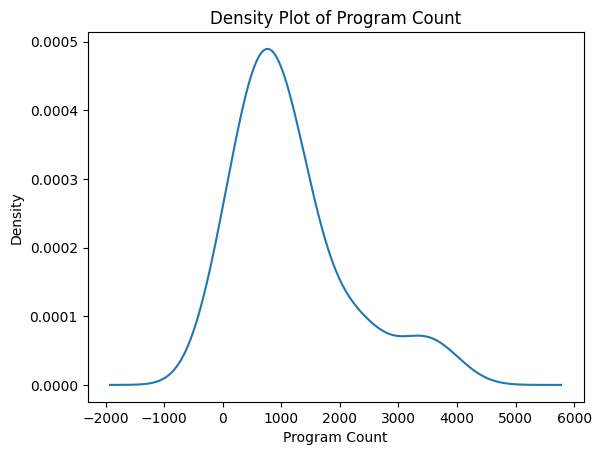

In [54]:
# Assuming 'merged_data2' is a DataFrame and 'Program_Count' is a column in it
s = merged_data2["Program_Count"]

# Plot the Kernel Density Estimation (KDE)
ax = s.plot.kde()

# Add labels and a title for better visualization
plt.xlabel('Program Count')
plt.ylabel('Density')
plt.title('Density Plot of Program Count')
plt.show()
#plot histogram, showing the number counts.T

### Using Log Transformation on Program Count

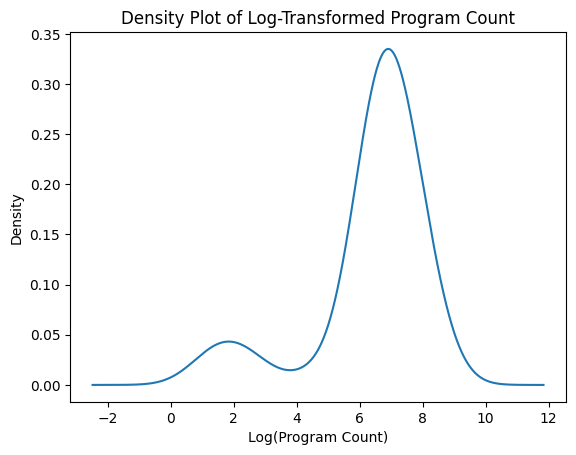

In [40]:
#log transformation because it is slightly skewed to the left
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_data2' is a DataFrame and 'Program_Count' is a column
# Apply a log transformation (adding 1 to avoid issues with log(0))
merged_data2['Log_Program_Count'] = np.log1p(merged_data2['Program_Count'])

# Plot the KDE of the log-transformed data
merged_data2['Log_Program_Count'].plot.kde()

# Add labels and a title
plt.xlabel('Log(Program Count)')
plt.ylabel('Density')
plt.title('Density Plot of Log-Transformed Program Count')
plt.show()


### Using Sqrt Transformation on Program Count

   Program_Count  Program_Count_Sqrt
0             12            3.464102
1             10            3.162278
2              2            1.414214
3              4            2.000000
4           1047           32.357379


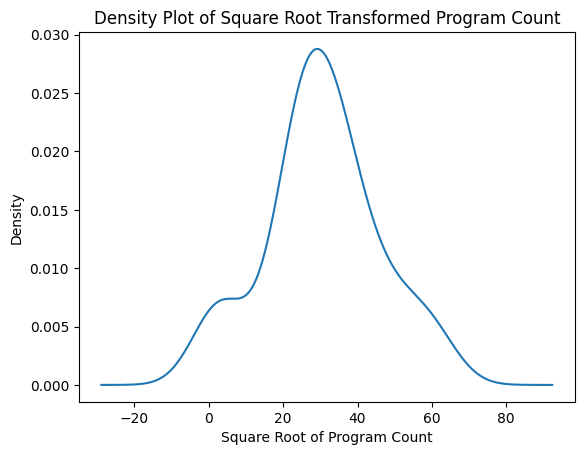

In [41]:
#squreroot transformation =  perfect

import numpy as np
import matplotlib.pyplot as plt

# Apply square root transformation to the 'Program_Count' column
merged_data2['Program_Count_Sqrt'] = np.sqrt(merged_data2['Program_Count'])

# Check the transformed data
print(merged_data2[['Program_Count', 'Program_Count_Sqrt']].head())

# Plot the Kernel Density Estimation (KDE) of the transformed data
merged_data2['Program_Count_Sqrt'].plot.kde()

# Add labels and title
plt.xlabel('Square Root of Program Count')
plt.ylabel('Density')
plt.title('Density Plot of Square Root Transformed Program Count')
plt.show()


### Distribution Plot of Median Income

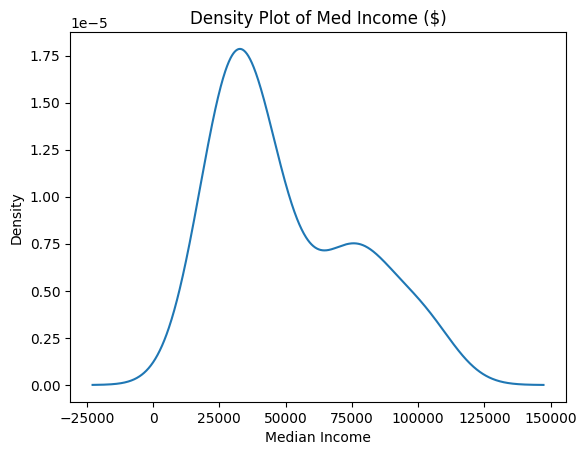

In [42]:
# Assuming 'merged_data2' is a DataFrame and 'Program_Count' is a column in it
t = merged_data2["Med_Income"]

# Plot the Kernel Density Estimation (KDE)
at = t.plot.kde()

# Add labels and a title for better visualization
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.title('Density Plot of Med Income ($)')
plt.show()
#plot histogram, showing the number counts.T

## Explanatory Data Analysis

### EDA 1 ScatterPlot (Program Count by Med Income)
Now, I want to see the relationship between the count of programs in each zip code and its family income using a scatterplot.

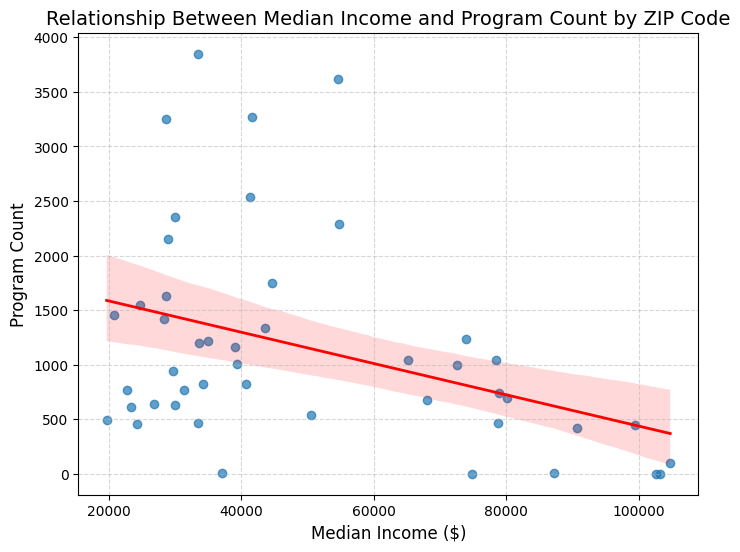

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x=merged_data2["Med_Income"],
    y=merged_data2["Program_Count"],
    scatter_kws={"alpha": 0.7},
    line_kws={"color": "red", "lw": 2}
)
plt.title("Relationship Between Median Income and Program Count by ZIP Code", fontsize=14)
plt.xlabel("Median Income ($)", fontsize=12)
plt.ylabel("Program Count", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### EDA 2 Correlation Matrix (Focus is on Med Income)

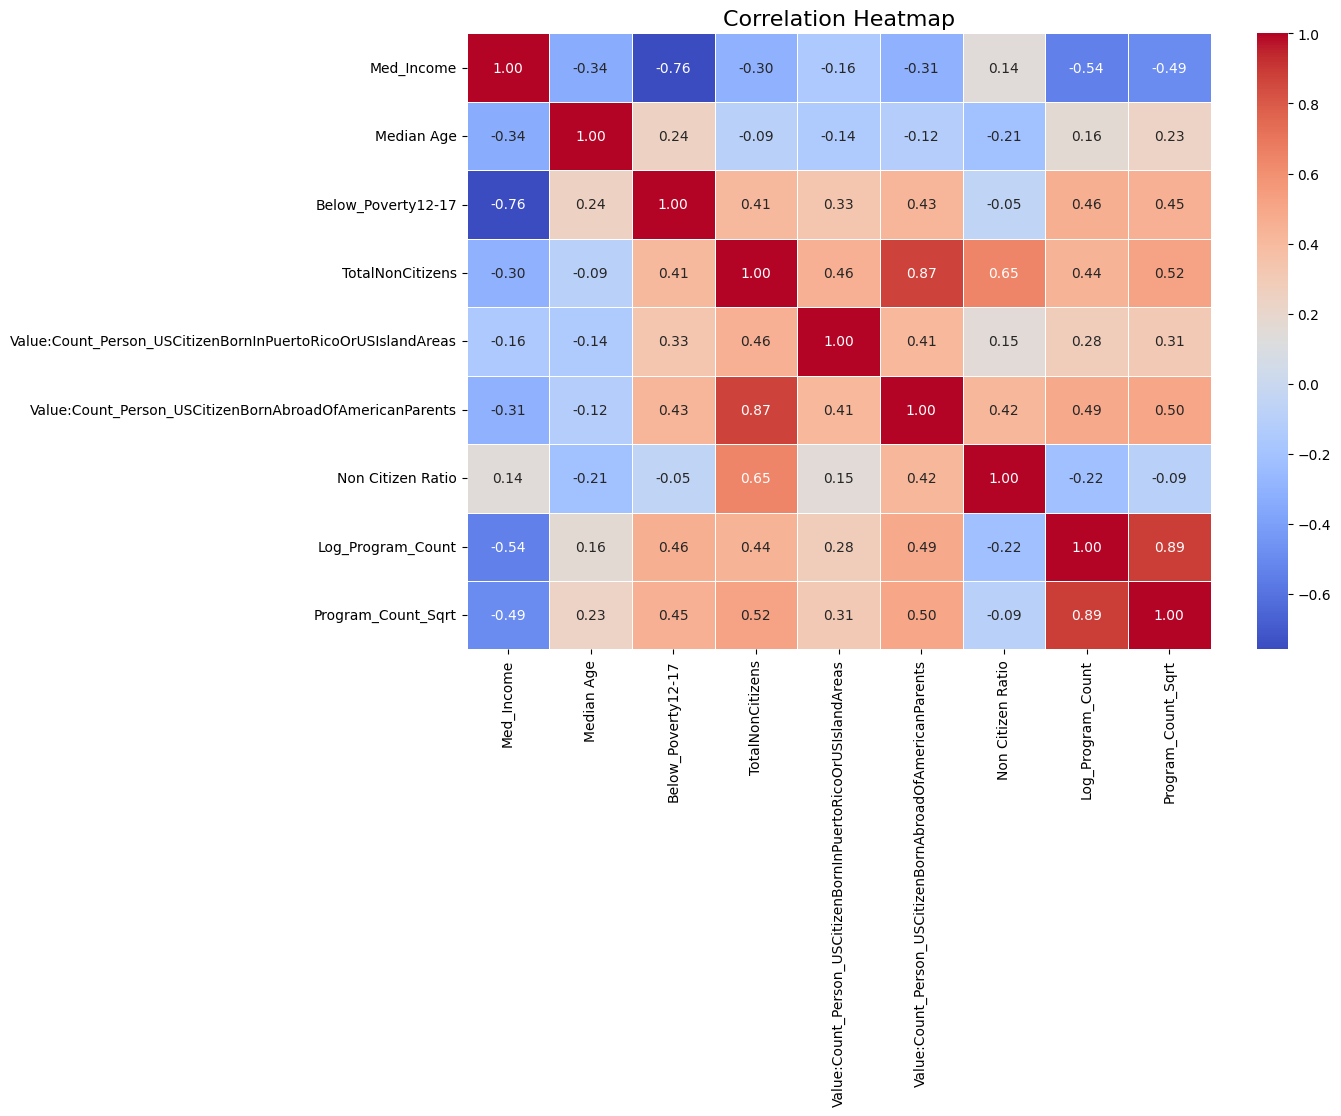

In [45]:
merged_data2_cleaned = merged_data2.drop(columns=["ZIP Code", "placeName_y", "Count_15to19","Total_Count", "Program_Count", "Above_Poverty12-17"])
correlation_matrix = merged_data2_cleaned.corr()


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    cmap="coolwarm",  # Diverging colormap
    fmt=".2f",  # Format values to two decimal places
    linewidths=0.5,  # Lines between cells
    cbar=True  # Show color bar
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

There seems to be a negative relationship between income and program count. The higher your income, the lower the program count. There is another strong relationship between povery 

## EDA 3 Map(Income Per Neighborhood)
Now, I will make a map with each zip code in the neighborhood and number of immigrants

I notice for the geographic cluster there are data points missing, we can impute this by using the zipcode and adding the name for it. 

In [46]:
chicago_expanded['neighborhood'].value_counts()

neighborhood
Loop               6
Ohare              5
Near West Side     5
West Town          5
Near North Side    4
                  ..
Edison Park        1
Altgeld Gardens    1
Kensington         1
Sauganash          1
Elsdon             1
Name: count, Length: 81, dtype: int64

In [47]:
scholarship_grouped_data

,ZIP Code,Program Count (Scholarship Available)
0,60605,52
1,60607,20
2,60609,60
3,60610,10
4,60611,2
5,60612,48
6,60613,12
7,60614,14
8,60615,12
9,60618,42


In [48]:
# Example to load the dataset
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,74,19093,18820,273,1.450584,1,0,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,75,22544,25226,-2682,-10.631888,0,1,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,76,12756,11956,800,6.691201,1,0,"MULTIPOLYGON (((-87.83658 41.9864, -87.83658 4..."
75,EDGEWATER,77,56521,62198,-5677,-9.127303,0,1,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


<Axes: >

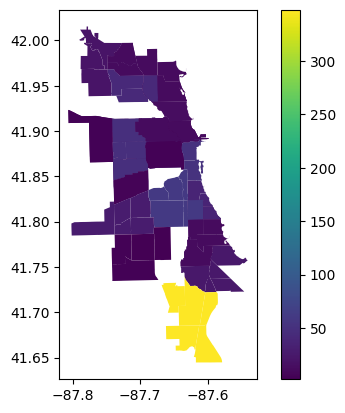

In [50]:
#scholarship map, first make a map given the median incomes of each neighborhood, 
# then add $ sign to each eachborhood that offers scholarships

incomemap = pd.merge(chicagozips, scholarship_grouped_data, on="ZIP Code", how = 'left')


# Capitalize neighborhood names in foodmap
incomemap["neighborhood"] = incomemap["neighborhood"].str.upper()

# Merge chicago with foodmap on neighborhood names
chicago["community"] = chicago["community"].str.upper()  # Ensure 'community' in chicago is capitalized
chicago2 = pd.merge(chicago, incomemap, left_on="community", right_on="neighborhood", how="left")
chicago2.plot(column = "Program Count (Scholarship Available)", legend=True)


### EDA 4 STEM Programs across the city

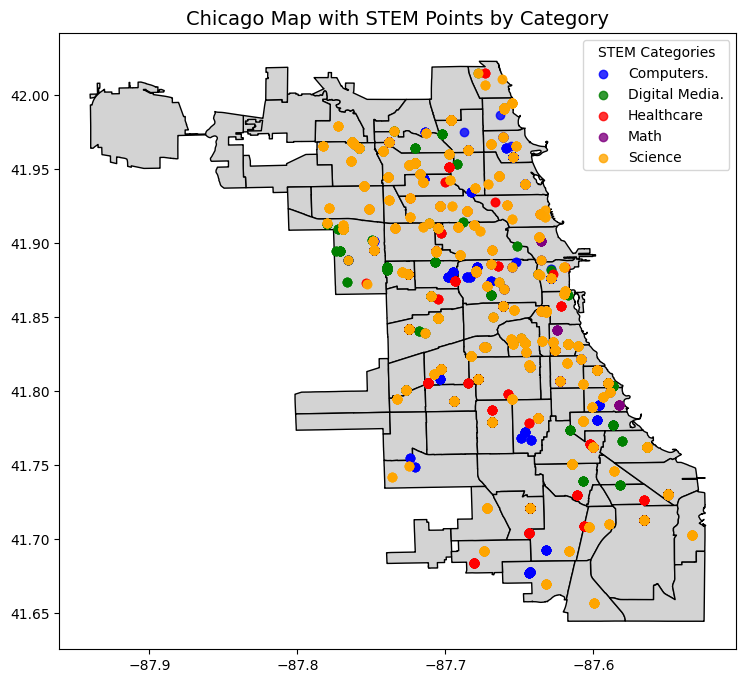

In [51]:
# Create a GeoDataFrame for STEM lats and longs
geometry_stem = [Point(xy) for xy in zip(stem["Longitude"], stem["Latitude"])]
points_stem = gpd.GeoDataFrame(stem, geometry=geometry_stem)

# Define a color map for each STEM category
color_map = {
    "Computers.": "blue",
    "Digital Media.": "green",
    "Healthcare": "red",
    "Math": "purple",
    "Science": "orange"
}

# Plot the Chicago map
fig, ax = plt.subplots(figsize=(12, 8))
chicago.plot(ax=ax, color="lightgrey", edgecolor="black")  # Base map

# Plot each STEM category with a unique color
for category, color in color_map.items():
    category_points = points_stem[points_stem["Category Name"] == category]
    category_points.plot(
        ax=ax, color=color, marker="o", alpha=0.8, label=category  # Customize color and transparency
    )

# Add legend and title
plt.legend(title="STEM Categories")
plt.title("Chicago Map with STEM Points by Category", fontsize=14)
plt.show()


In [52]:
chicagozips
deduplicated_chicagozips = chicagozips.drop_duplicates(subset="neighborhood")

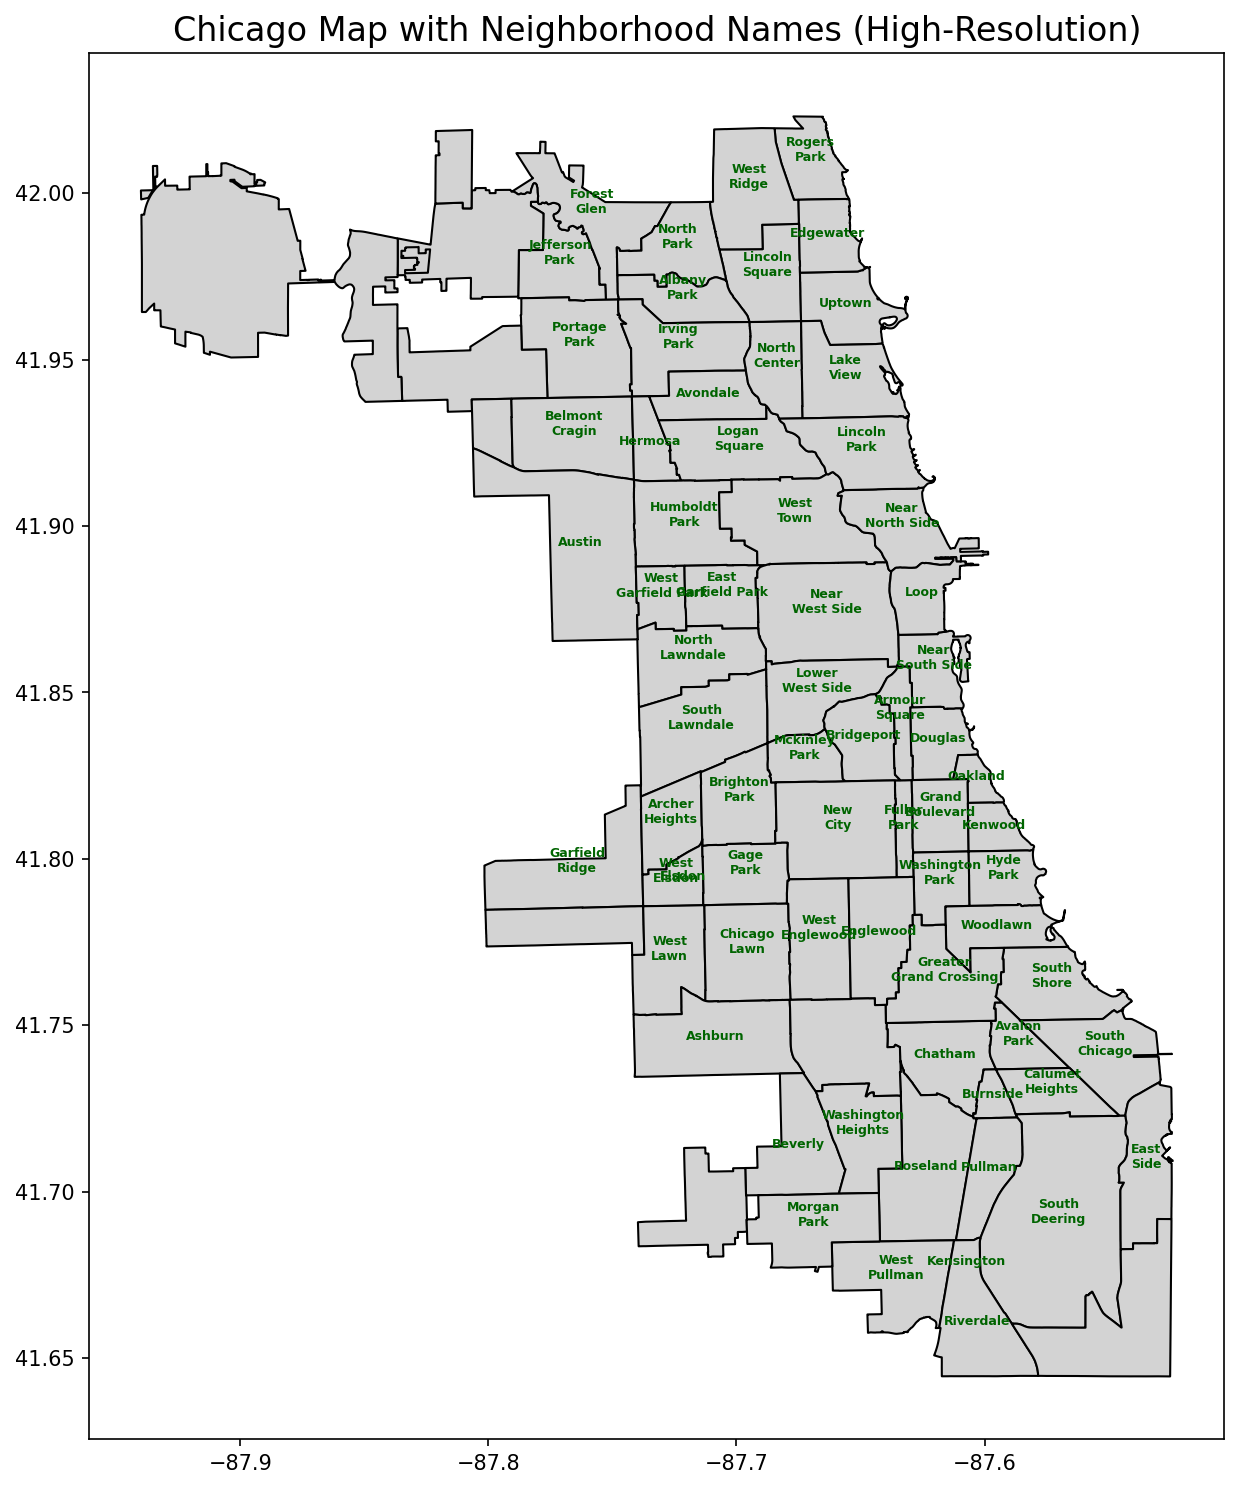

In [53]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Create GeoDataFrame from deduplicated neighborhoods
geometry_zips = [Point(xy) for xy in zip(deduplicated_chicagozips["lng"], deduplicated_chicagozips["lat"])]
points_chicago_zips = gpd.GeoDataFrame(deduplicated_chicagozips, geometry=geometry_zips)

# Plot the Chicago map
fig, ax = plt.subplots(figsize=(16, 12), dpi=150)  # Increase figure size and DPI for better resolution
chicago.plot(ax=ax, color="lightgrey", edgecolor="black")  # Base map

# Add neighborhood names with forced wrapping
for x, y, label in zip(
    points_chicago_zips.geometry.x,
    points_chicago_zips.geometry.y,
    points_chicago_zips["neighborhood"]
):
    # Split label into two lines if it contains a space
    if " " in label:
        label = label.replace(" ", "\n", 1)  # Replace the first space with a newline
    ax.text(
        x, y, label, fontsize=6, fontweight='bold', ha="center", color="darkgreen"  # Slightly larger text for readability
    ) 

# Add a title
plt.title("Chicago Map with Neighborhood Names (High-Resolution)", fontsize=16)
plt.show()


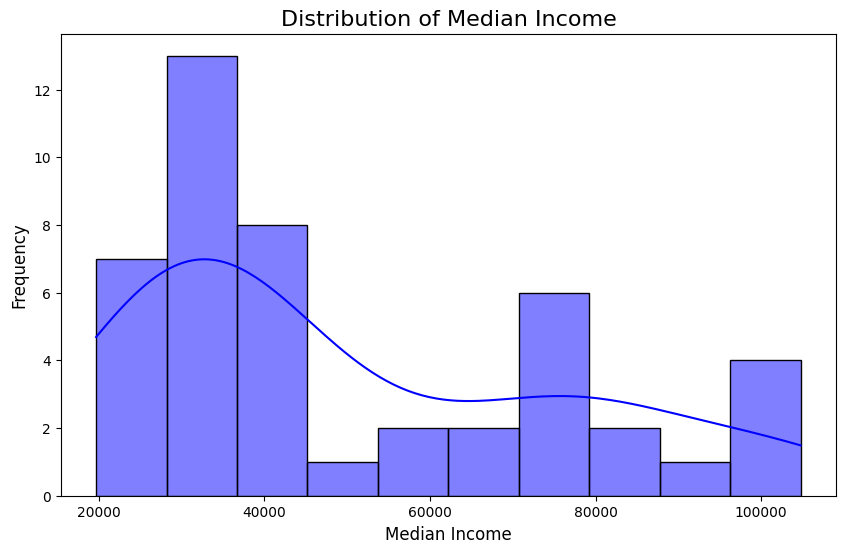

In [54]:

# 1. Histogram of Median Income
plt.figure(figsize=(10, 6))
sns.histplot(merged_data2['Med_Income'], bins=10, kde=True, color='blue')
plt.title('Distribution of Median Income', fontsize=16)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### EDA 5 Neighborhoods with Free Food

<Axes: >

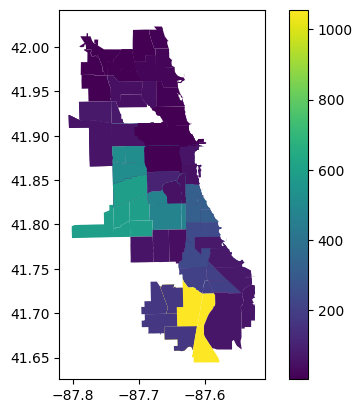

In [55]:
# Merge food_grouped_data with chicagozips on 'ZIP Code'
foodmap = pd.merge(food_grouped_data, chicagozips, on="ZIP Code", how="inner")

# Capitalize neighborhood names in foodmap
foodmap["neighborhood"] = foodmap["neighborhood"].str.upper()

# Merge chicago with foodmap on neighborhood names
chicago["community"] = chicago["community"].str.upper()  # Ensure 'community' in chicago is capitalized
chicago1 = pd.merge(chicago, foodmap, left_on="community", right_on="neighborhood", how="inner")
chicago1.plot(column = "Program Count (Free Food)", legend=True)


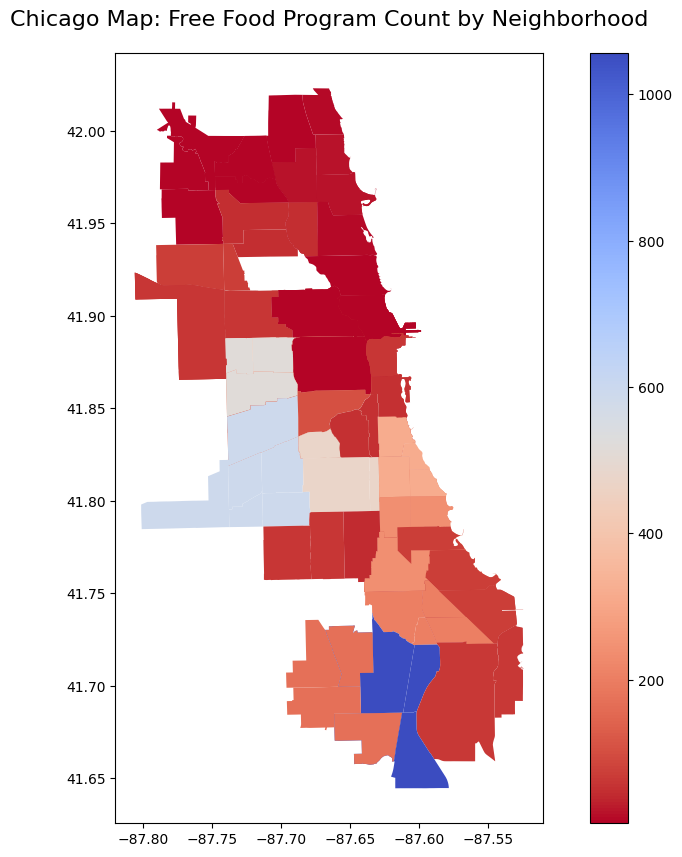

In [56]:
# Plot the map with a reversed colormap
ax = chicago1.plot(column="Program Count (Free Food)", cmap="coolwarm_r", legend=True, figsize=(12, 10))

# Add a title
ax.set_title("Chicago Map: Free Food Program Count by Neighborhood", fontsize=16, pad=20)

# Show the plot
plt.show()


In [57]:
data5 = pd.merge(deduplicated_chicagozips, merged_data2, on = "ZIP Code", how = "inner")
# Sort by 'Med_Income'
data5_sorted_by_income = data5.sort_values(by="Med_Income", ascending=True)
data5_sorted_by_income

,neighborhood,lat,lng,state_id,ZIP Code,Med_Income,Count_15to19,Median Age,Total_Count,placeName_y,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents,Program_Count,Non Citizen Ratio,Log_Program_Count,Program_Count_Sqrt
60,Englewood,41.77720,-87.64250,IL,60621,19697,1743,37.4,26997,60621,859,1404,512,40,53,496,0.018965,6.208590,22.271057
24,West Garfield Park,41.87859,-87.73023,IL,60624,20756,2646,34.8,35664,60624,1468,1863,614,153,18,1458,0.017216,7.285507,38.183766
59,West Englewood,41.77593,-87.66660,IL,60636,23433,1993,37.4,29833,60636,1091,1231,1834,25,64,610,0.061476,6.415097,24.698178
58,Chicago Lawn,41.77185,-87.69567,IL,60636,23433,1993,37.4,29833,60636,1091,1231,1834,25,64,610,0.061476,6.415097,24.698178
8,Woodlawn,41.77888,-87.59493,IL,60637,24226,5789,31.2,51145,60637,1911,2414,2572,86,878,457,0.050288,6.126869,21.377558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Lake View,41.94423,-87.65600,IL,60657,72632,1406,30.9,71192,60657,86,1765,3771,279,701,994,0.052969,6.902743,31.527766
44,North Center,41.94779,-87.68384,IL,60657,72632,1406,30.9,71192,60657,86,1765,3771,279,701,994,0.052969,6.902743,31.527766
34,Loop,41.87887,-87.62519,IL,60605,78477,1299,32.9,34314,60605,0,820,3631,168,302,1047,0.105817,6.954639,32.357379
33,Near North Side,41.89960,-87.63331,IL,60610,78911,1612,32.3,42904,60610,313,825,3340,64,388,737,0.077848,6.603944,27.147744


,ZIP Code,Program Count (Free Food)
0,60602,16
1,60604,4
2,60605,106
3,60606,60
4,60607,29
5,60608,105
6,60609,474
7,60610,14
8,60611,30
9,60612,393


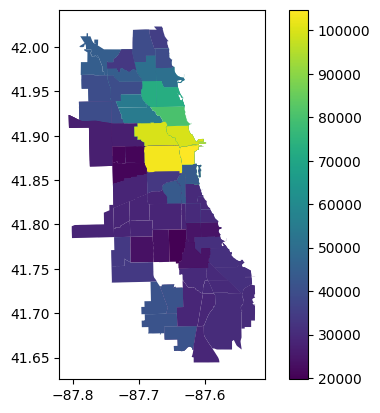

In [59]:

# Merge food_grouped_data with chicagozips on 'ZIP Code'
incomesegmap = pd.merge(merged_data2, chicagozips, on="ZIP Code", how="inner")

incomesegmap["neighborhood"] = incomesegmap["neighborhood"].str.upper()

chicago["community"] = chicago["community"].str.upper()  # Ensure 'community' in chicago is capitalized
chicago3 = pd.merge(chicago, incomesegmap, left_on="community", right_on="neighborhood", how="inner")
chicago3.plot(column = "Med_Income", legend=True)


food_grouped_data

#incomesegmap

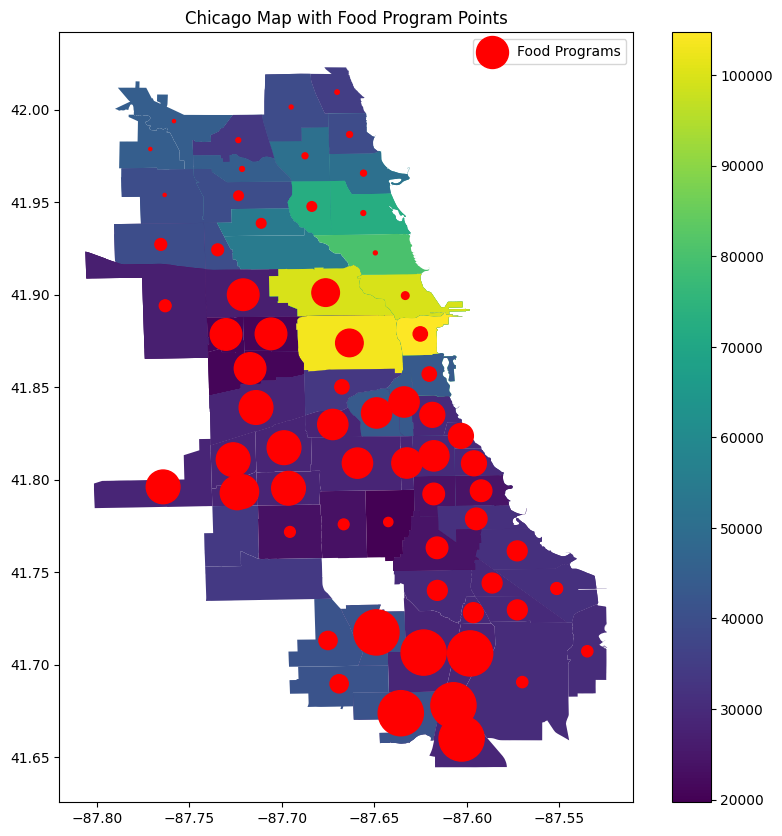

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Ensure ZIP Code in both datasets is the same type
incomesegmap['ZIP Code'] = incomesegmap['ZIP Code'].astype(str)
food_grouped_data['ZIP Code'] = food_grouped_data['ZIP Code'].astype(str)

# Merge food_grouped_data with incomesegmap to get coordinates
food_with_coords = pd.merge(food_grouped_data, incomesegmap, on="ZIP Code", how="inner")

# Create GeoDataFrame for food points
geometry = [Point(xy) for xy in zip(food_with_coords['lng'], food_with_coords['lat'])]
food_gdf = gpd.GeoDataFrame(food_with_coords, geometry=geometry)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
chicago3.plot(column="Med_Income", legend=True, ax=ax, cmap='viridis')

# Add food points to the map
food_gdf.plot(ax=ax, color='red', marker='o', markersize=food_gdf['Program Count (Free Food)'], label="Food Programs")

# Add legend and title
plt.legend()
plt.title("Chicago Map with Food Program Points")
plt.show()


In [78]:
food_grouped_data.sort_values(by = "Program Count (Free Food)", ascending= True)

,ZIP Code,Program Count (Free Food)
1,60604,4
38,60661,4
36,60654,4
24,60630,5
11,60614,8
37,60659,8
22,60626,10
10,60613,12
21,60625,12
7,60610,14


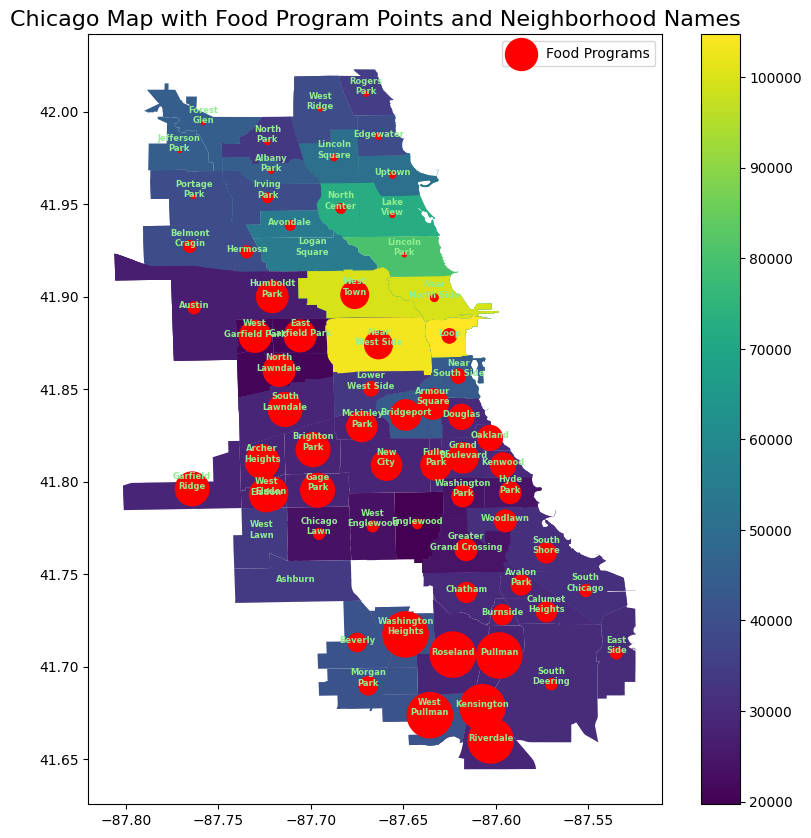

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Ensure ZIP Code in both datasets is the same type
incomesegmap['ZIP Code'] = incomesegmap['ZIP Code'].astype(str)
food_grouped_data['ZIP Code'] = food_grouped_data['ZIP Code'].astype(str)

# Merge food_grouped_data with incomesegmap to get coordinates
food_with_coords = pd.merge(food_grouped_data, incomesegmap, on="ZIP Code", how="inner")

# Create GeoDataFrame for food points
geometry = [Point(xy) for xy in zip(food_with_coords['lng'], food_with_coords['lat'])]
food_gdf = gpd.GeoDataFrame(food_with_coords, geometry=geometry)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
chicago3.plot(column="Med_Income", legend=True, ax=ax, cmap='viridis')

# Add food points to the map
food_gdf.plot(ax=ax, color='red', marker='o', markersize=food_gdf['Program Count (Free Food)'], label="Food Programs")

# Add neighborhood names to the map
for x, y, label in zip(
    points_chicago_zips.geometry.x,
    points_chicago_zips.geometry.y,
    points_chicago_zips["neighborhood"]
):
    # Split label into two lines if it contains a space
    if " " in label:
        label = label.replace(" ", "\n", 1)  # Replace the first space with a newline
    ax.text(
        x, y, label, fontsize=6, fontweight='bold', ha="center", color="lightgreen"  # Text formatting
    )

# Add legend and title
plt.legend()
plt.title("Chicago Map with Food Program Points and Neighborhood Names", fontsize=16)
plt.show()


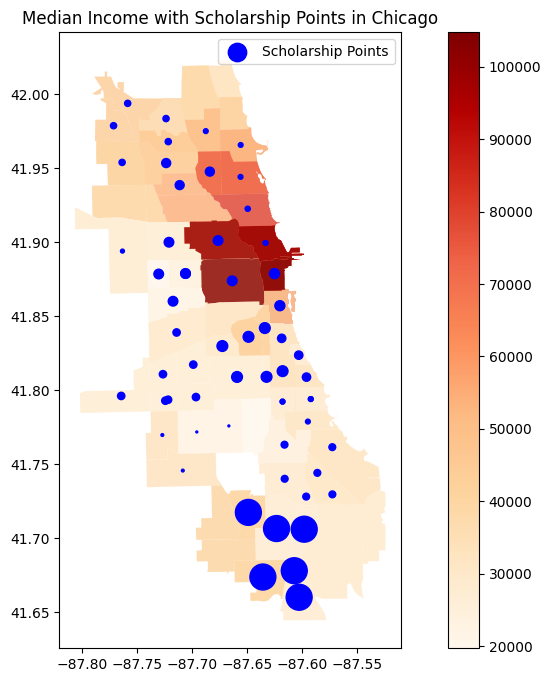

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge the scholarship data with incomesegmap to get lat/lng information
scholarship_data = pd.merge(scholarship_grouped_data, incomesegmap, on="ZIP Code", how="left")

# Convert the DataFrame to a GeoDataFrame for geospatial plotting
scholarship_gdf = gpd.GeoDataFrame(
    scholarship_data,
    geometry=gpd.points_from_xy(scholarship_data['lng'], scholarship_data['lat']),
    crs="EPSG:4326"
)

# Ensure chicago3 is a GeoDataFrame (assuming it already is from earlier code)
# Plot the Med_Income map
fig, ax = plt.subplots(figsize=(12, 8))
chicago3.plot(column="Med_Income", legend=True, ax=ax, cmap="OrRd", alpha=0.8)

# Add scholarship points to the map
scholarship_gdf.plot(
    ax=ax,
    color="blue",
    markersize=scholarship_gdf["Program Count (Scholarship Available)"],
    label="Scholarship Points"
)

# Add title and legend
plt.title("Median Income with Scholarship Points in Chicago")
plt.legend()
plt.show()


In [75]:
scholarship_grouped_data.sort_values(by = "Program Count (Scholarship Available)", ascending = True)

,ZIP Code,Program Count (Scholarship Available)
4,60611,2
18,60636,2
20,60644,4
22,60652,4
25,60657,4
26,60661,4
12,60623,6
21,60651,8
3,60610,10
19,60637,12


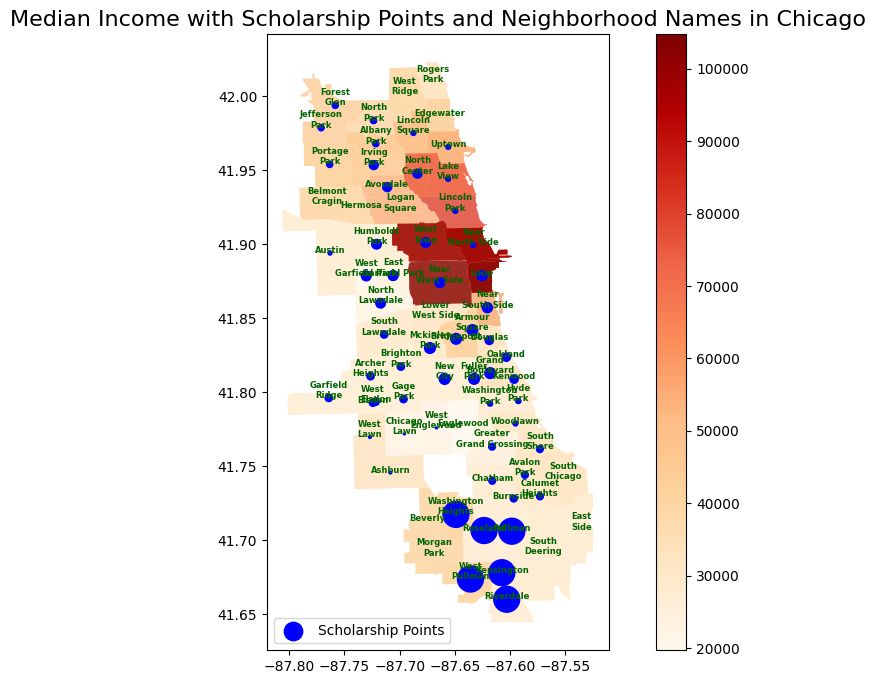

In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge the scholarship data with incomesegmap to get lat/lng information
scholarship_data = pd.merge(scholarship_grouped_data, incomesegmap, on="ZIP Code", how="left")

# Convert the DataFrame to a GeoDataFrame for geospatial plotting
scholarship_gdf = gpd.GeoDataFrame(
    scholarship_data,
    geometry=gpd.points_from_xy(scholarship_data['lng'], scholarship_data['lat']),
    crs="EPSG:4326"
)

# Ensure chicago3 is a GeoDataFrame (assuming it already is from earlier code)
# Plot the Median Income map
fig, ax = plt.subplots(figsize=(12, 8))
chicago3.plot(column="Med_Income", legend=True, ax=ax, cmap="OrRd", alpha=0.8)

# Add scholarship points to the map
scholarship_gdf.plot(
    ax=ax,
    color="blue",
    markersize=scholarship_gdf["Program Count (Scholarship Available)"],
    label="Scholarship Points"
)

# Add neighborhood names to the map
for x, y, label in zip(
    points_chicago_zips.geometry.x,
    points_chicago_zips.geometry.y,
    points_chicago_zips["neighborhood"]
):
    # Split label into two lines if it contains a space
    if " " in label:
        label = label.replace(" ", "\n", 1)  # Replace the first space with a newline
    ax.text(
        x, y, label, fontsize=6, fontweight='bold', ha="center", color="darkgreen"  # Text formatting
    )

# Add title and legend
plt.title("Median Income with Scholarship Points and Neighborhood Names in Chicago", fontsize=16)
plt.legend()
plt.show()


In [62]:
# Temporarily adjust display settings to show all rows
# Group by 'Geographic Cluster Name' and list associated ZIP codes
zip_codes_by_cluster = alldata_filtered.groupby('Geographic Cluster Name')['ZIP Code'].unique()

# Convert to DataFrame for better viewing (optional)
zip_codes_by_cluster_df = zip_codes_by_cluster.reset_index(name='Associated ZIP Codes')
zip_codes_by_cluster_df

zip_codes_by_cluster_df.to_csv('zip_codes_by_cluster.csv', index=False)


In [63]:
poorkids.to_csv("poorkids.csv", index = False)

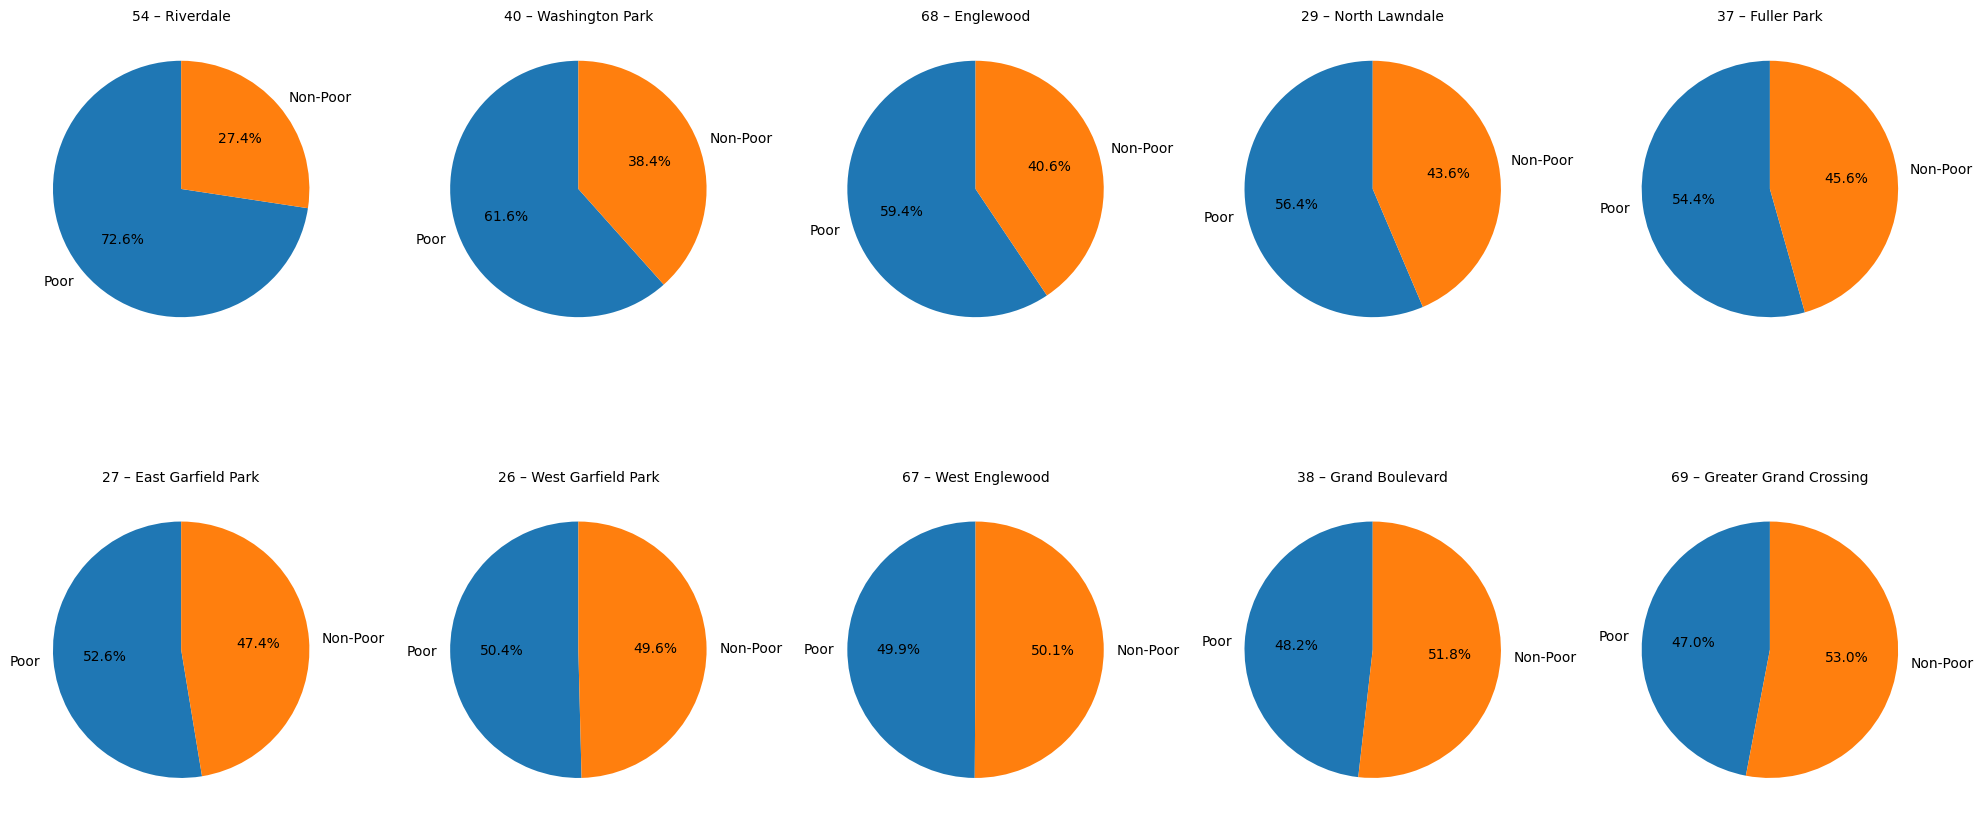

In [64]:
import matplotlib.pyplot as plt

# Limit to the top neighborhoods with the highest poor percentage for clarity in pie charts
top_neighborhoods = data_cleaned.head(10)

# Create a grid for pie charts
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each neighborhood
for i, (ax, row) in enumerate(zip(axes, top_neighborhoods.itertuples())):
    data = [row.Poor_Percentage, 100 - row.Poor_Percentage]  # Poor vs Non-poor
    ax.pie(data, labels=['Poor', 'Non-Poor'], autopct='%1.1f%%', startangle=90)
    ax.set_title(row.Neighborhood, fontsize=10)

# Remove any unused subplots
for j in range(len(top_neighborhoods), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Here, I'd like to check which zip codes don't have any values. 

In [65]:
# Filter rows where 'Geographic Cluster Name' is null or empty
missing_cluster_zip_codes = alldata_filtered[alldata_filtered['Geographic Cluster Name'].isnull()]

# Extract unique ZIP codes from those rows
unique_missing_cluster_zip_codes = missing_cluster_zip_codes['ZIP Code'].unique()

# Display the result
missing_cluster_zip_codes_df = pd.DataFrame(unique_missing_cluster_zip_codes, columns=['ZIP Code'])
missing_cluster_zip_codes_df

,ZIP Code
0,60609.0
1,60644.0
2,60603.0
3,60660.0
4,60649.0
5,60647.0
6,60608.0
7,60623.0
8,60624.0
9,60602.0


In [66]:
finalmerge["Program ID"].nunique()

52940

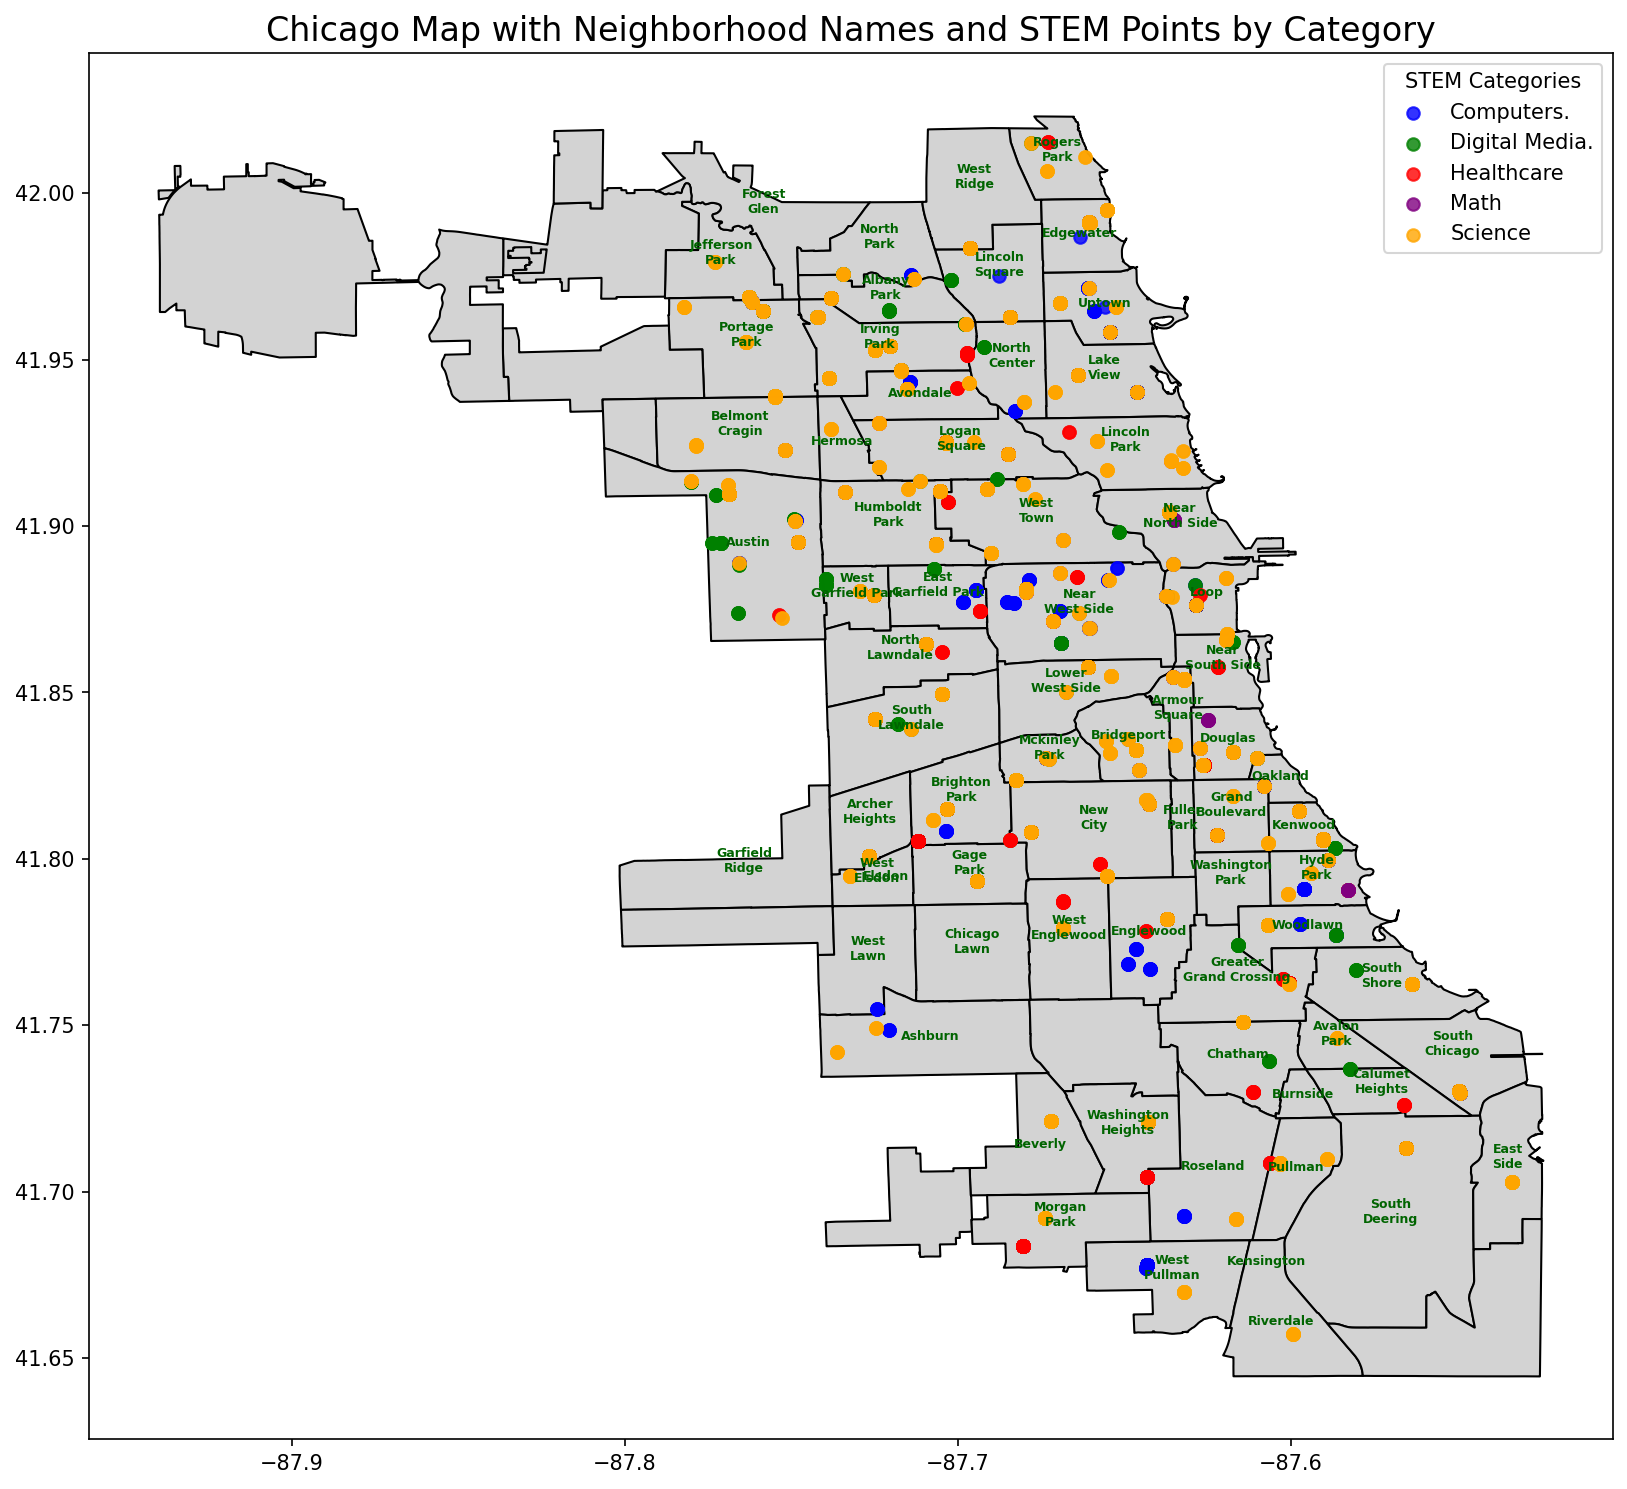

In [67]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Create GeoDataFrame for STEM points
geometry_stem = [Point(xy) for xy in zip(stem["Longitude"], stem["Latitude"])]
points_stem = gpd.GeoDataFrame(stem, geometry=geometry_stem)

# Define a color map for each STEM category
color_map = {
    "Computers.": "blue",
    "Digital Media.": "green",
    "Healthcare": "red",
    "Math": "purple",
    "Science": "orange"
}

# Create GeoDataFrame for Chicago neighborhoods
geometry_zips = [Point(xy) for xy in zip(deduplicated_chicagozips["lng"], deduplicated_chicagozips["lat"])]
points_chicago_zips = gpd.GeoDataFrame(deduplicated_chicagozips, geometry=geometry_zips)

# Plot the Chicago map with combined features
fig, ax = plt.subplots(figsize=(16, 12), dpi=150)  # Increase figure size and DPI for better resolution
chicago.plot(ax=ax, color="lightgrey", edgecolor="black")  # Base map

# Plot STEM categories with different colors
for category, color in color_map.items():
    category_points = points_stem[points_stem["Category Name"] == category]
    category_points.plot(
        ax=ax, color=color, marker="o", alpha=0.8, label=category  # Customize color and transparency
    )

# Add neighborhood names with forced wrapping
for x, y, label in zip(
    points_chicago_zips.geometry.x,
    points_chicago_zips.geometry.y,
    points_chicago_zips["neighborhood"]
):
    # Split label into two lines if it contains a space
    if " " in label:
        label = label.replace(" ", "\n", 1)  # Replace the first space with a newline
    ax.text(
        x, y, label, fontsize=6, fontweight='bold', ha="center", color="darkgreen"  # Slightly larger text for readability
    )

# Add legend and title
plt.legend(title="STEM Categories")
plt.title("Chicago Map with Neighborhood Names and STEM Points by Category", fontsize=16)
plt.show()


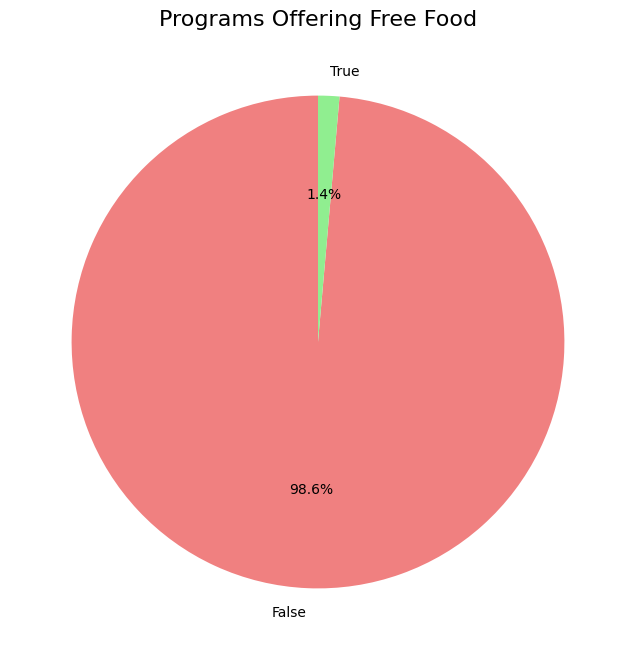

,Program ID,Program Name,Category Name,Capacity,City,State,ZIP Code,Program Type,Program Price,Geographic Cluster Name,Scholarship Available,Participants Paid,Transport Provided,Has Free Food,Meeting Type,Tag,Latitude,Longitude,Location,Med_Income,Count_15to19,Median Age,Total_Count,Below_Poverty12-17,Above_Poverty12-17,TotalNonCitizens,Value:Count_Person_USCitizenBornInPuertoRicoOrUSIslandAreas,Value:Count_Person_USCitizenBornAbroadOfAmericanParents,neighborhood,lat,lng,state_id
16,119277,Weightlifting at Union,Sports + Wellness.,10.0,Chicago,IL,60607,workshop,Free,NEAR WEST SIDE,False,Not Paid,False,False,face_to_face,Program,41.884602,-87.664200,POINT (-87.664199829 41.884601593),73910,2728,30.9,28797,108,486,3778,236,214,Near West Side,41.87401,-87.66352,IL
17,176040,Origami Workshop with Ty Yamamoto,Music & Art.,0.0,Chicago,IL,60608,workshop,Free,BRIDGEPORT,False,Not Paid,False,False,face_to_face,Event,41.832638,-87.646461,POINT (-87.646461487 41.832637787),33462,4002,34.1,82749,1176,3487,11864,635,978,Near West Side,41.87401,-87.66352,IL
18,176040,Origami Workshop with Ty Yamamoto,Music & Art.,0.0,Chicago,IL,60608,workshop,Free,BRIDGEPORT,False,Not Paid,False,False,face_to_face,Event,41.832638,-87.646461,POINT (-87.646461487 41.832637787),33462,4002,34.1,82749,1176,3487,11864,635,978,South Lawndale,41.83909,-87.71400,IL
19,176040,Origami Workshop with Ty Yamamoto,Music & Art.,0.0,Chicago,IL,60608,workshop,Free,BRIDGEPORT,False,Not Paid,False,False,face_to_face,Event,41.832638,-87.646461,POINT (-87.646461487 41.832637787),33462,4002,34.1,82749,1176,3487,11864,635,978,Lower West Side,41.85027,-87.66757,IL
20,176040,Origami Workshop with Ty Yamamoto,Music & Art.,0.0,Chicago,IL,60608,workshop,Free,BRIDGEPORT,False,Not Paid,False,False,face_to_face,Event,41.832638,-87.646461,POINT (-87.646461487 41.832637787),33462,4002,34.1,82749,1176,3487,11864,635,978,Mckinley Park,41.82992,-87.67250,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389680,150777,Dance - Hip Hop at West Pullman,Sports + Wellness.,10.0,Chicago,IL,60628,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192,Pullman,41.70613,-87.59825,IL
389681,150777,Dance - Hip Hop at West Pullman,Sports + Wellness.,10.0,Chicago,IL,60628,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192,West Pullman,41.67382,-87.63574,IL
389682,150777,Dance - Hip Hop at West Pullman,Sports + Wellness.,10.0,Chicago,IL,60628,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192,Riverdale,41.66014,-87.60285,IL
389683,150777,Dance - Hip Hop at West Pullman,Sports + Wellness.,10.0,Chicago,IL,60628,workshop,Free,Far South Equity Zone,False,Not Paid,False,False,face_to_face,Program,41.669998,-87.632202,POINT (-87.632202148 41.669998169),28921,3675,40.4,61419,1486,2887,896,40,192,Washington Heights,41.71749,-87.64890,IL


In [188]:
# Count occurrences of "Has Free Food"


# List of ZIP codes to filter
zip_codes = [
    '60643', '60609', '60607', '60616', '60608', '60613', '60647',
    '60623', '60624', '60640', '60625', '60639', '60659', '60641',
    '60649', '60621', '60619', '60628', '60617', '60601', '60644',
    '60605', '60654', '60611', '60603', '60636', '60660', '60602',
    '60610', '60612', '60632', '60642', '60606', '60637', '60604',
    '60618', '60615', '60653', '60626', '60622', '60652', '60614',
    '60661', '60657', '60651', '60630'
]# Define the list of ZIP codes to filter by


# Filter the program data by the specified ZIP codes
datafiltered = finalmerge[finalmerge['ZIP Code'].astype(str).isin(zip_codes)]
free_food_counts = finalmerge['Has Free Food'].value_counts()

# Plot pie chart for "Has Free Food"
plt.figure(figsize=(8, 8))
free_food_counts.plot.pie(autopct='%1.1f%%', labels=['False', 'True'], colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Programs Offering Free Food', fontsize=16)
plt.ylabel('')  # Remove y-axis label for better aesthetics
plt.show()

datafiltered